# SMA Final Project

## Twitter User Network Analysis:

* 1\. [Dataset Preparation](#data-prep)
   * 1.1. [Graph Dataset Creation](#data-create)
   * 1.2. [Data Cleaning](#data-clean)
   * 1.3. [Graph Creation using Networkx](#networkx)
* 2\. [Graph Analysis](#graph-analysis)
   * 2.1. [Number of Nodes and Edges](#nodes)
   * 2.2. [Average Degree](#avg-degree)
   * 2.3. [Average Clustering Coefficient](#avg-coef)
   * 2.4. [Degree Centrality](#degree)
   * 2.5. [Closeness Centrality](#closeness)
   * 2.6. [Betweeness Centrality](#betweeness)
   * 2.7. [PageRank Analysis](#page-rank)
   * 2.8. [Clustering Coefficient Analysis](#cca)
* 3\. [Giant Connected Component (GCC)](#gcc)
   * 3.1. [Finding the Giant Connected Component (GCC) in the graph](#gcc-graph)
   * 3.2. [Giant Connected Component (GCC): Color Coded Visualization](#gcc-visual)
* 4\. [Community Detection](#cd)
   * 4.1. [Community Detection using Louvain Method](#cd-lv)
   * 4.2. [Top 10 Communities](#ten-comm)
   * 4.3. [Visualization of Top 10 Communities using Bar Graph](#bar)
   * 4.4. [Football Club Affiliations in the Top 10 Communities](#club-aff)
   * 4.5. [Visualization of Football Club Affiliations in Communities using Pie Chart](#pie)
   * 4.6. [Dominant Football Club in each of the Top 10 Communities](#domin)
   * 4.7. [Visualization of the Dominant Club in the Communities using Bar Graph](#domin-bar)

## Sentiment Analysis using NRCLex :

* 1\. [Learning the Dataset](#about-dataset)
   * 1.1. [Importing the Dataset](#import-dataset)
   * 1.2. [Checking out the attributes](#check-attr)
   * 1.3. [Finding out of the unique football clubs from the dataset](#unique-teams)
* 2\. [Performing NRCLex to find Sentiments in the Tweets for Each Football Clubs](#perform-nrclex)
   * 2.1. [Grouping the tweets based on football clubs](#group-tweets)
   * 2.2\. [Preprocessing](#preprocessing)
       * 2.2.1. [Removing Usernames, Hashtags, URL's and Punctuation from the tweets](#preprocess-remove)
       * 2.2.2. [Removing Stopwords from the tweets](#remove-stopwords)
   * 2.3. [Applying NRCLex model to find out the emotions of the tweet and plot them](#plot-nrclex)
   
## Influence of Geographic Location:
* 1\. [Cleaning the Location attribute](#clean-location)
    * 1.1. [Removing the rows which have null values](#remove-null)
    * 1.2. [Removing the rows with values containing special characters except ','](#remove-special)
* 2\. [Finding the continent based on the Location Attribute](#find-continent)
    * 2.1. [Funciton for finding the continent of the given location using GeoLocator](#get-continent)
    * 2.2. [Finding continent names for the unique locations of the dataset](#unique-location)
    * 2.3. [Applying the continent names to the dataset](#apply-dataset)
    * 2.4. [Removing all the rows where continent name is Uknown](#remove-unknown)
    
<h3 style="margin-left: 12px;">Sentiment Analysis</h3>

* 3\. [Grouping the tweets by continent](#group-tweet)
* 4\. [Preprocessing the tweets](#preprocessing-tweets)
    * 4.1. [Removing Usernames, Hashtags, URL's and Punctuation from the tweets](#remove-url)
    * 4.2. [Removing Stopwords from the tweets](#remove-stopword)
* 5\. [Performing Sentiment Analysis and calculating sentiment scores for each continent using VADER](#sentiment-vader)
* 6\. [Plotting the sentiment scores on the world map using GeoPandas](#world-map)
* 7\. [Plotting the sentiment scores on the HeatMap](#heat-map)
* 8\. [Plotting the sentiment scores over a period of time](#time-period)
* 9\. [Plotting the sentiment scores captured for different Football Clubs](#diff-foot)
* 10\. [Plotting the Sentiment of each Football Club for each Continent](#foot-cont)

<h3 style="margin-left: 12px;">Topic Modelling</h3>

* 11\. [Preprocessing by removing Usernames, Hashtags, URL's, Stopwords and Punctuation from the tweets](#preprocess-topic)
* 12\. [Grouping the tweets based on Continent](#group-cont)
* 13\. [Perform topic modeling for each continent](#topic-cont)
* 14\. [Performing topic modelling based on Football Clubs](#topic-foot)


# Twitter User Network Analysis

## Dataset Preparation <a class="anchor" id="data-prep"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

import networkx as nx
from matplotlib.lines import Line2D
import community

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords') 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

from nrclex import NRCLex

from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import pycountry_convert as pc
from tqdm import tqdm

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import geopandas as gpd
import seaborn as sns
from textblob import TextBlob

from gensim import corpora, models
import gensim

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akshaynarra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv("twitter-project.csv")

### Graph Dataset Creation <a class="anchor" id="data-create"></a>

In [3]:
# Filtering the tweets that consist user mentions
df = df[df['text'].str.contains('@')]

In [4]:
# Extracting the user mentions in the tweets to the user_mentions column
df['user_mentions'] = df['text'].str.findall(r'@(\w+)').apply(lambda x: ', '.join(x))

In [5]:
# Creating user_mentions_clubs dataframe to create the graph
user_mentions_clubs = df[['username', 'user_mentions', 'file_name']]

In [6]:
user_mentions_clubs

,username,user_mentions,file_name
4,crystalpalacedan,ChelseaFC,CrystalPalace
6,EZE25 ™️,HLTCO,CrystalPalace
7,Crystal Palace F.C Women,"RoversLadies, FAWomensChamp",CrystalPalace
9,Crystal Palace F.C.,R_Riakporhe,CrystalPalace
10,Crystal Palace Festival,BlakTwang,CrystalPalace
...,...,...,...
211310,THE BLUE ROOM,jonathanliew,Everton
211322,Rich Fisher,Resistance77UK,Everton
211323,East Anglian Blues,Carabao_Cup,Everton
211325,CapitalLivNews,Carabao_Cup,Everton


### Data Cleaning <a class="anchor" id="data-clean"></a>

In [7]:
# Converting user_mention to a list of usernames
user_mentions_clubs['user_mentions'] = user_mentions_clubs['user_mentions'].apply(lambda x: x.split(','))

# Exploding the list of user mentions into separate rows
user_mentions_clubs = user_mentions_clubs.explode('user_mentions')

# Droping duplicates
user_mentions_clubs.drop_duplicates(inplace=True)

/var/folders/w3/rtcs4_w57zd0q2z2xl13sgzc0000gn/T/ipykernel_1683/2467460167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_mentions_clubs['user_mentions'] = user_mentions_clubs['user_mentions'].apply(lambda x: x.split(','))


In [8]:
user_mentions_clubs

,username,user_mentions,file_name
4,crystalpalacedan,ChelseaFC,CrystalPalace
6,EZE25 ™️,HLTCO,CrystalPalace
7,Crystal Palace F.C Women,RoversLadies,CrystalPalace
7,Crystal Palace F.C Women,FAWomensChamp,CrystalPalace
9,Crystal Palace F.C.,R_Riakporhe,CrystalPalace
...,...,...,...
211322,Rich Fisher,Resistance77UK,Everton
211323,East Anglian Blues,Carabao_Cup,Everton
211336,Big Rossi,DavyKlaassen,Everton
211336,Big Rossi,JumeirahAN,Everton


### Graph Creation using Networkx <a class="anchor" id="networkx"></a>

In [9]:
# Creating an empty directed graph
G_club = nx.Graph()

# Adding nodes (users) to the graph with football club attribute
for _, row in user_mentions_clubs.iterrows():
    username = row['username']
    club = row['file_name']
    
    # Adding node with football club attribute
    G_club.add_node(username, club=club)

# Iterating through the DataFrame to add edges based on common user mentions
for _, row in user_mentions_clubs.iterrows():
    username = row['username']
    mentioned_user = row['user_mentions']
    
    # Adding an edge if both usernames are present in the graph as nodes
    if G_club.has_node(username) and G_club.has_node(mentioned_user):
        G_club.add_edge(username, mentioned_user)

## Graph Analysis <a class="anchor" id="graph-analysis"></a>

### Number of Nodes and Edges <a class="anchor" id="nodes"></a>

In [10]:
# Number of nodes
num_nodes = G_club.number_of_nodes()
print(f"Number of nodes: {num_nodes}")

# Number of edges
num_edges = G_club.number_of_edges()
print(f"Number of edges: {num_edges}")

Number of nodes: 27578
Number of edges: 5891


### Average Degree <a class="anchor" id="avg-degree"></a>

In [11]:
# Average degree
avg_degree = sum(dict(G_club.degree()).values()) / num_nodes
print(f"Average degree: {avg_degree:.2f}")

Average degree: 0.43


### Average Clustering Coefficient <a class="anchor" id="avg-coef"></a>

In [12]:
# Average clustering coefficient
avg_clustering = nx.average_clustering(G_club)
print(f"Average clustering coefficient: {avg_clustering:.4f}")

Average clustering coefficient: 0.0042


### Degree Centrality <a class="anchor" id="degree"></a>

In [13]:
# Degree Centrality
degree_centrality = nx.degree_centrality(G_club)

print("Top 10 Nodes by Degree Centrality:\n")
top_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
for node, centrality in top_nodes:
    print(f"User: {node}, Centrality: {centrality}")

Top 10 Nodes by Degree Centrality:

User: Arsenal, Centrality: 0.05602494832650397
User: LFC, Centrality: 0.05178228233672988
User: FabrizioRomano, Centrality: 0.040541030568952384
User: Everton, Centrality: 0.01925517641512855
User: LCFC, Centrality: 0.009573195053849222
User: talkSPORT, Centrality: 0.008956739311745295
User: utdreport, Centrality: 0.00797766254487435
User: CPFC, Centrality: 0.004641549117017804
User: afcstuff, Centrality: 0.0014867462015447654
User: OptaJoe, Centrality: 0.0009428146643942415


### Closeness Centrality <a class="anchor" id="closeness"></a>

In [14]:
# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G_club)

print("Top 10 Nodes by Closeness Centrality:\n")
top_nodes = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
for node, centrality in top_nodes:
    print(f"User: {node}, Centrality: {centrality}")

Top 10 Nodes by Closeness Centrality:

User: Mark, Centrality: 0.08787786785594312
User: Arsenal, Centrality: 0.08723583777115085
User: FabrizioRomano, Centrality: 0.0870263099182965
User: Joe, Centrality: 0.08286063133455657
User: Pitch Sport Football, Centrality: 0.08216731826349014
User: Lee, Centrality: 0.08026550041658483
User: Paul, Centrality: 0.08008198048574895
User: AFC Info, Centrality: 0.08003318348339646
User: ArsenalAddy ⚽️, Centrality: 0.08003318348339646
User: ✍🏼 ✍🏼 AUOAR DONE DEAL., Centrality: 0.08003318348339646


### Betweenness Centrality <a class="anchor" id="betweeness"></a>

In [15]:
# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G_club)

print("Top 10 Nodes by Betweenness Centrality:\n")
top_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
for node, centrality in top_nodes:
    print(f"User: {node}, Centrality: {centrality}")

Top 10 Nodes by Betweenness Centrality:

User: Arsenal, Centrality: 0.01833728500423962
User: LFC, Centrality: 0.017061148908858688
User: FabrizioRomano, Centrality: 0.014287786365500627
User: Everton, Centrality: 0.006608544670136543
User: LCFC, Centrality: 0.0031150277943544215
User: talkSPORT, Centrality: 0.0029603502958902334
User: utdreport, Centrality: 0.002443360802451452
User: CPFC, Centrality: 0.0014849879531994691
User: Mark, Centrality: 0.0009858184635332466
User: Lee, Centrality: 0.00046933254327968446


### PageRank Analysis <a class="anchor" id="page-rank"></a>

In [16]:
# PageRank
pagerank = nx.pagerank(G_club)

print("Top 10 Nodes by PageRank:\n")
top_nodes = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]
for node, rank in top_nodes:
    print(f"User: {node}, Rank: {rank}")

Top 10 Nodes by PageRank:

User: Arsenal, Rank: 0.07722518351146965
User: LFC, Rank: 0.07224267985387244
User: FabrizioRomano, Rank: 0.0540216773770567
User: Everton, Rank: 0.025713438516387587
User: LCFC, Rank: 0.012122517248038171
User: talkSPORT, Rank: 0.011386979287646643
User: utdreport, Rank: 0.010230420975784202
User: CPFC, Rank: 0.005962779494092009
User: afcstuff, Rank: 0.0017949941962843187
User: PepTeam, Rank: 0.001078494964254722


### Clustering Coefficient Analysis <a class="anchor" id="cca"></a>

In [17]:
# Clustering Coefficient
clustering_coefficient = nx.clustering(G_club)

print("Top 10 Nodes by Clustering Coefficient:\n")
top_nodes = sorted(clustering_coefficient.items(), key=lambda x: x[1], reverse=True)[:10]
for node, coefficient in top_nodes:
    print(f"User: {node}, Coefficient: {coefficient}")

Top 10 Nodes by Clustering Coefficient:

User: Baz Lee, Coefficient: 1.0
User: Manchester United, Coefficient: 1.0
User: Scott Wilkinson, Coefficient: 1.0
User: What Would Fergie Do, Coefficient: 1.0
User: United Reveal, Coefficient: 1.0
User: Red Devil Updates, Coefficient: 1.0
User: Reece Gibson, Coefficient: 1.0
User: ωilf👊🏾#BLM #glazersout, Coefficient: 1.0
User: tunjung utomo, Coefficient: 1.0
User: centredevils, Coefficient: 1.0


## Giant Connected Component (GCC) <a class="anchor" id="gcc"></a>

### Finding the Giant Connected Component (GCC) in the graph <a class="anchor" id="gcc-graph"></a>

In [18]:
# Finding the Giant Connected Component (GCC) of the graph
gcc_nodes = max(nx.connected_components(G_club), key=len)
gcc = G_club.subgraph(gcc_nodes)

### Giant Connected Component (GCC): Color Coded Visualization <a class="anchor" id="gcc-visual"></a>

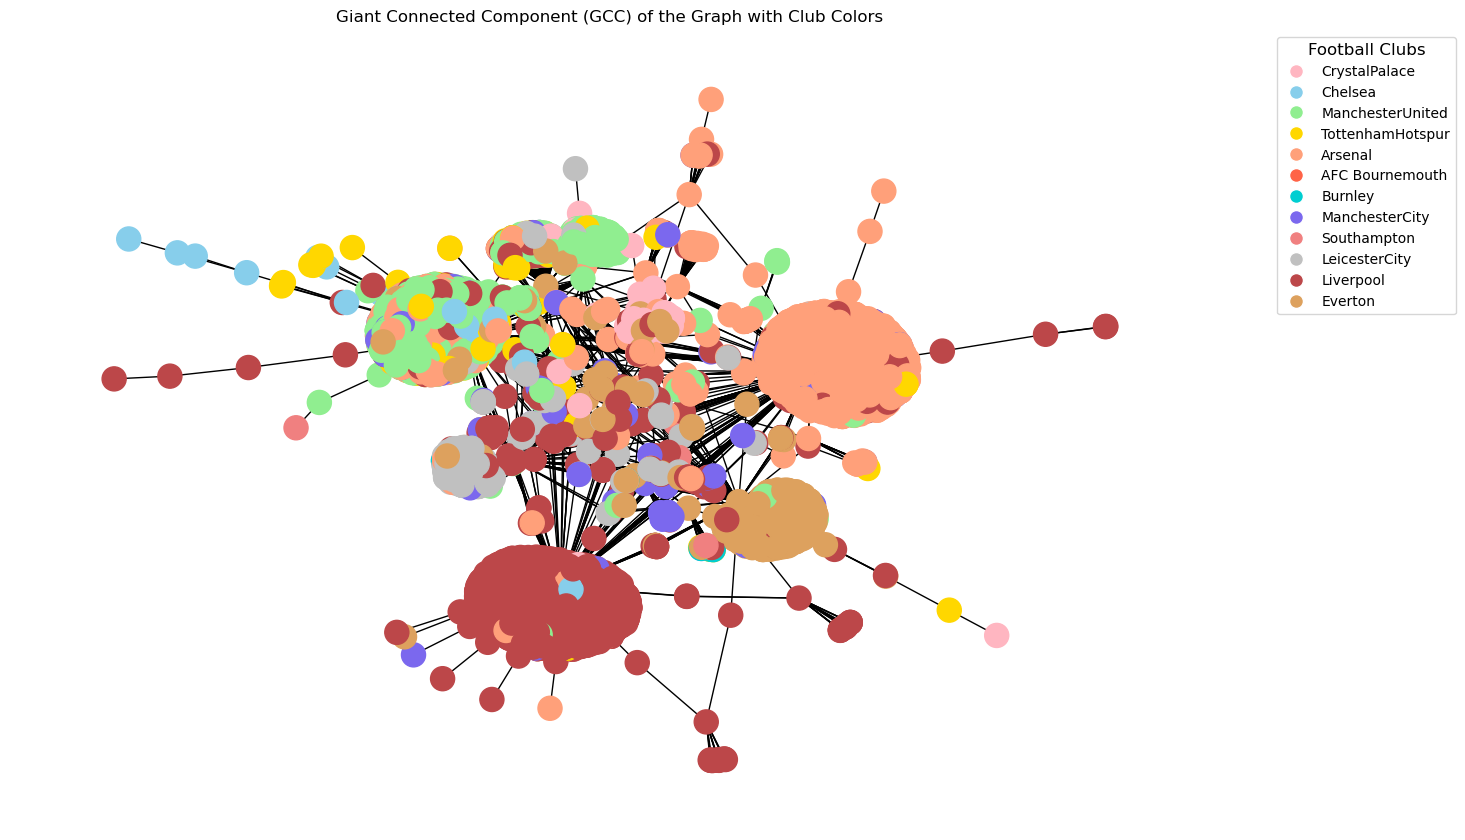

In [19]:
# Creating a color map for nodes based on football clubs
club_colors = {
    'CrystalPalace': '#FFB6C1',   # Light Pink
    'Chelsea': '#87CEEB',         # Sky Blue
    'ManchesterUnited': '#90EE90', # Light Green
    'TottenhamHotspur': '#FFD700', # Gold
    'Arsenal': '#FFA07A',         # Light Salmon
    'AFC Bournemouth': '#FF6347', # Tomato
    'Burnley': '#00CED1',         # Dark Turquoise
    'ManchesterCity': '#7B68EE',  # Medium Slate Blue
    'Southampton': '#F08080',     # Light Coral
    'LeicesterCity': '#C0C0C0',    # Silver
    'Liverpool': '#BC4749',       # Light Stone Red
    'Everton': '#DDA15E'          # Sandy Brown
}

# Get node colors based on football clubs
node_colors = [club_colors[gcc.nodes[node]['club']] for node in gcc.nodes]

# Defining legend elements for club colors
legend_elements = [Line2D([0], [0], marker='o', color='w', label=club,
                          markerfacecolor=color, markersize=10)
                   for club, color in club_colors.items()]

# Visualizing the GCC with color-coded nodes and club color legend
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(gcc, seed=42)  # Layout for the graph (seed for reproducibility)
nx.draw(gcc, pos=pos, with_labels=False, node_color=node_colors, node_size=300, font_size=10, cmap=plt.cm.Set1)

# Adding legend for club colors on the side
plt.legend(handles=legend_elements, title='Football Clubs', title_fontsize='large', fontsize='medium',
           bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Giant Connected Component (GCC) of the Graph with Club Colors')

# Adjusting plot margins to make room for legend
plt.subplots_adjust(right=0.8)  # Increase the right margin to make space for the legend

# Show the plot
plt.show()

## Community Detection <a class="anchor" id="cd"></a>

### Community Detection using Louvain Method <a class="anchor" id="cd-lv"></a>

In [20]:
# Performing community detection using the Louvain method
partition = community.best_partition(G_club)

# Creating a DataFrame to store node information
node_data = pd.DataFrame(list(partition.items()), columns=['node', 'community'])
node_data['club'] = node_data['node'].apply(lambda x: G_club.nodes[x]['club'])

# Calculating the size (number of nodes) of each community
community_sizes = node_data.groupby('community').size().reset_index(name='size')

# Sorting communities by size in descending order and select the top 10
top_10_communities = community_sizes.nlargest(10, 'size')

# Filtering node data to include only nodes from the top 10 communities
top_10_node_data = node_data[node_data['community'].isin(top_10_communities['community'])]

# Grouping nodes by community and club affiliation within the top 10 communities
community_club_counts = top_10_node_data.groupby(['community', 'club']).size().reset_index(name='count')

### Top 10 Communities <a class="anchor" id="ten-comm"></a>

In [21]:
# Showing the top 10 communities based on node size
communities = []
sizes = []
print("Top 10 Communities Based on Node Size:")
for index, row in top_10_communities.iterrows():
    community_id = row['community']
    communities.append(community_id)
    community_size = row['size']
    sizes.append(community_size)
    print(f"Community {community_id}: Size = {community_size}")

Top 10 Communities Based on Node Size:
Community 37: Size = 1402
Community 103: Size = 1355
Community 60: Size = 1002
Community 25: Size = 495
Community 15: Size = 271
Community 17: Size = 260
Community 118: Size = 214
Community 1: Size = 131
Community 26: Size = 109
Community 3454: Size = 26


In [22]:
# Reverse communities for visulization
sizes = sizes[::-1]
communities = communities[::-1]

### Visualization of Top 10 Communities using Bar Graph <a class="anchor" id="bar"></a>

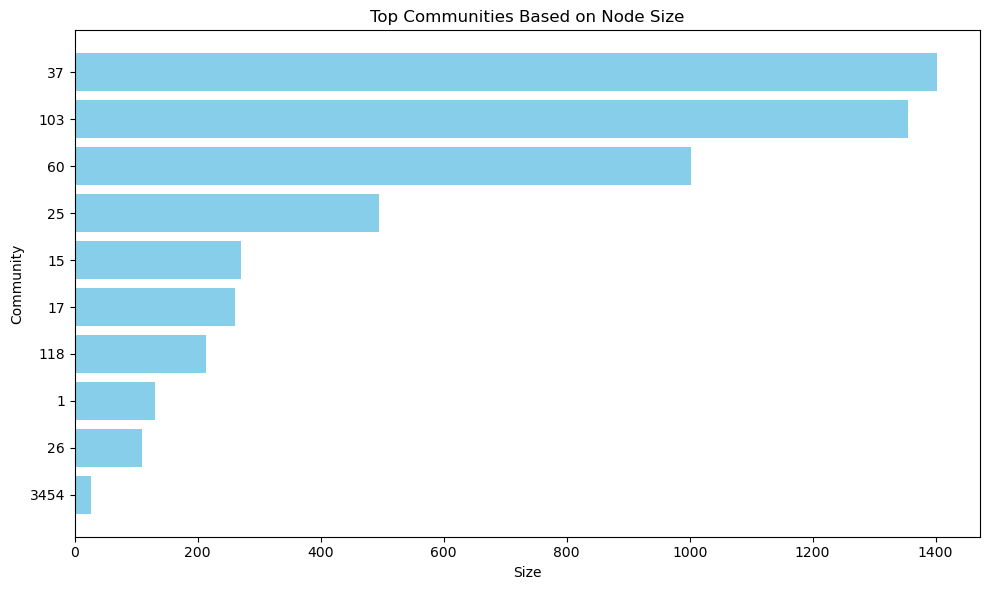

In [23]:
# Bar plot
plt.figure(figsize=(10, 6))  # Set the figure size (width, height)

# Creating a horizontal bar chart
communities_mapping = [str(c) for c in communities]  # Convert community numbers to strings
plt.barh(communities_mapping, sizes, color='skyblue')

plt.ylabel('Community')
plt.xlabel('Size')
plt.title('Top Communities Based on Node Size')

# Adjusting layout to prevent clipping of labels
plt.tight_layout()

plt.show()

### Football Club Affiliations in the Top 10 Communities <a class="anchor" id="club-aff"></a>

In [24]:
# Display club affiliations for the top 10 communities
for community_id in top_10_communities['community']:
    print(f"Community {community_id} Club Affiliations:")
    community_data = community_club_counts[community_club_counts['community'] == community_id]
    for _, row in community_data.iterrows():
        print(f"- {row['club']}: {row['count']}")

    print()

Community 37 Club Affiliations:
- Arsenal: 1268
- Burnley: 1
- Chelsea: 1
- CrystalPalace: 2
- Everton: 15
- LeicesterCity: 13
- Liverpool: 52
- ManchesterCity: 26
- ManchesterUnited: 13
- Southampton: 2
- TottenhamHotspur: 9

Community 103 Club Affiliations:
- Arsenal: 33
- Chelsea: 4
- CrystalPalace: 1
- Everton: 13
- LeicesterCity: 5
- Liverpool: 1276
- ManchesterCity: 12
- ManchesterUnited: 4
- Southampton: 2
- TottenhamHotspur: 5

Community 60 Club Affiliations:
- AFC Bournemouth: 2
- Arsenal: 214
- Burnley: 1
- Chelsea: 25
- CrystalPalace: 2
- Everton: 40
- LeicesterCity: 29
- Liverpool: 73
- ManchesterCity: 74
- ManchesterUnited: 437
- Southampton: 5
- TottenhamHotspur: 100

Community 25 Club Affiliations:
- Arsenal: 2
- CrystalPalace: 3
- Everton: 418
- LeicesterCity: 6
- Liverpool: 43
- ManchesterCity: 4
- ManchesterUnited: 14
- Southampton: 1
- TottenhamHotspur: 4

Community 15 Club Affiliations:
- Arsenal: 19
- Burnley: 1
- Chelsea: 2
- CrystalPalace: 14
- Everton: 25
- Leic

### Visualization of Football Club Affiliations in Communities using Pie Chart <a class="anchor" id="pie"></a>

Community 37 Club Affiliations:


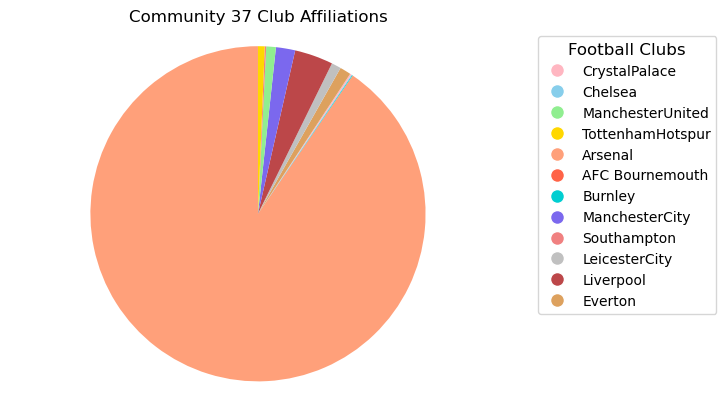


Community 103 Club Affiliations:


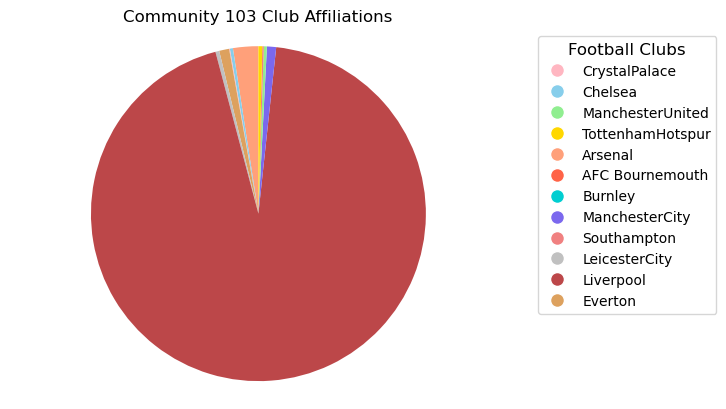


Community 60 Club Affiliations:


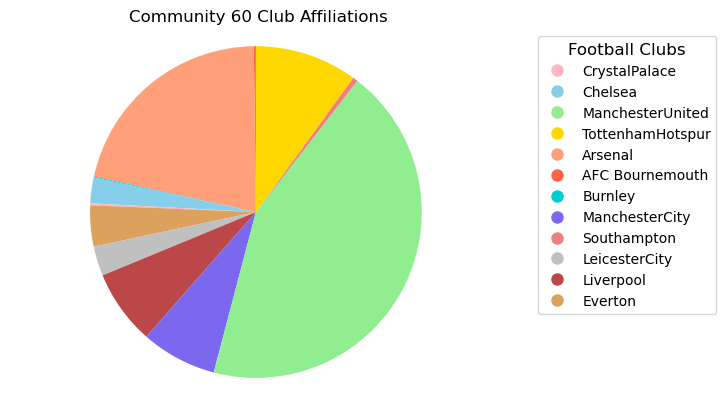


Community 25 Club Affiliations:


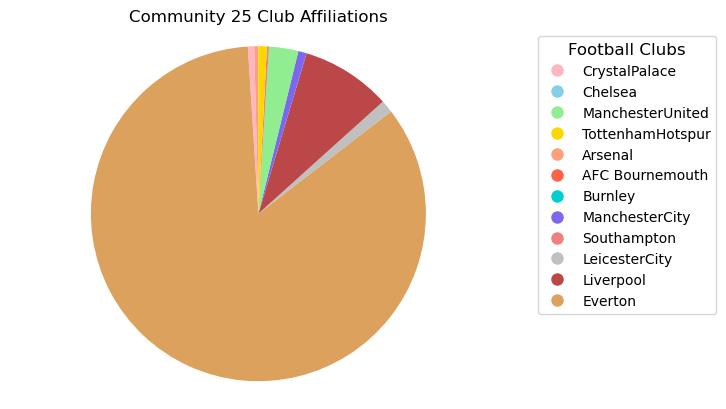


Community 15 Club Affiliations:


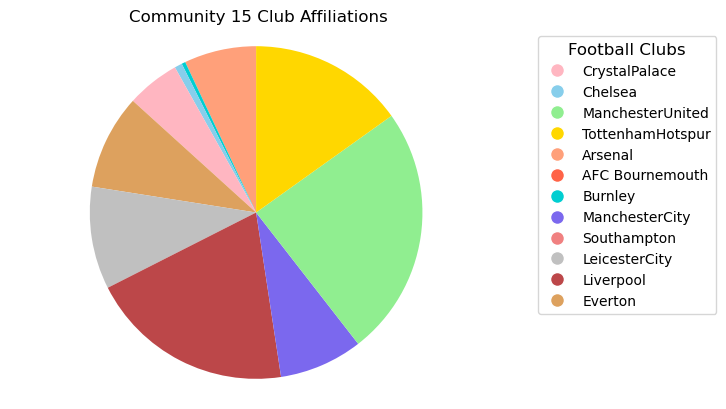


Community 17 Club Affiliations:


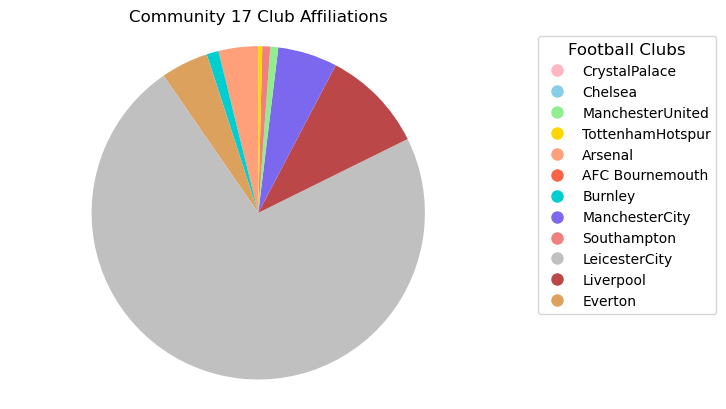


Community 118 Club Affiliations:


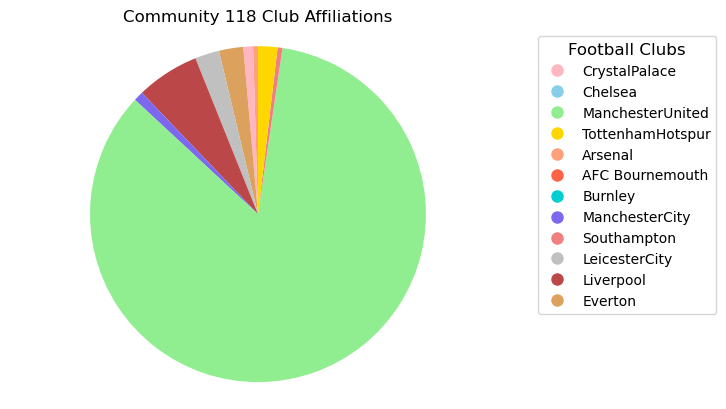


Community 1 Club Affiliations:


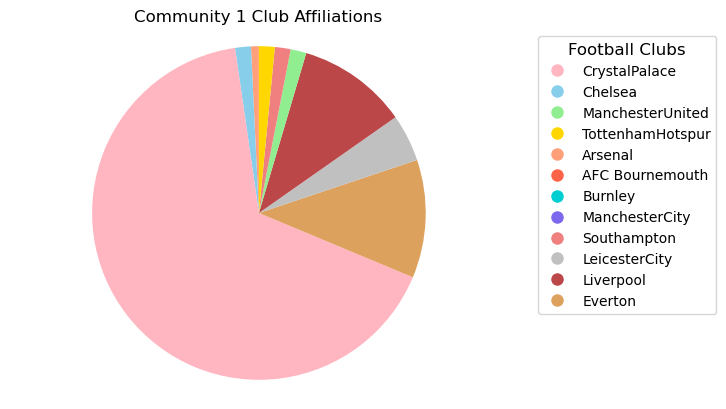


Community 26 Club Affiliations:


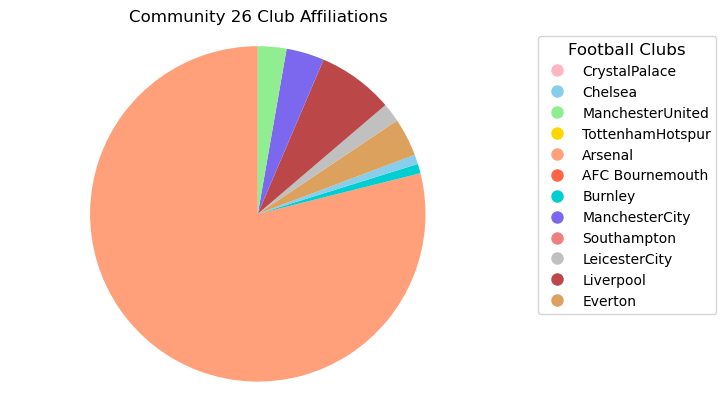


Community 3454 Club Affiliations:


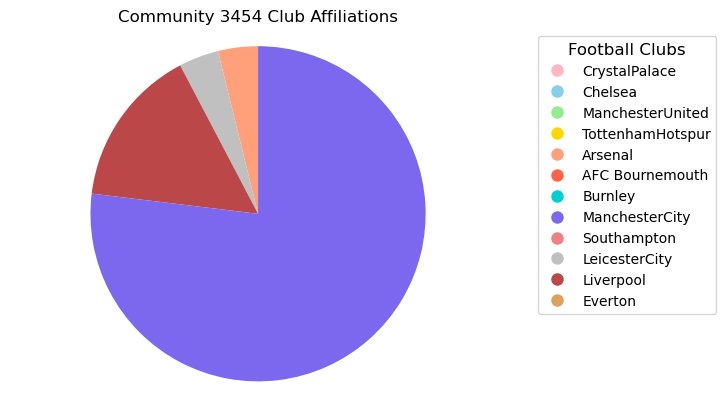

In [25]:
# Displaying club affiliations for the top 10 communities
for community_id in top_10_communities['community']:
    print(f"Community {community_id} Club Affiliations:")
    community_data = community_club_counts[community_club_counts['community'] == community_id]

    # Extracting club counts and names
    club_counts = community_data['count'].values
    club_names = community_data['club'].values

    # Pie chart
    fig, ax = plt.subplots()
    ax.pie(club_counts, colors=[club_colors.get(club, 'gray') for club in community_data['club']], startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures the pie chart is drawn as a circle
    ax.set_title(f'Community {community_id} Club Affiliations')
    
    # Adding legend for club colors on the side
    plt.legend(handles=legend_elements, title='Football Clubs', title_fontsize='large', fontsize='medium',
           bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.show()
    print()

### Dominant Football Club in each of the Top 10 Communities <a class="anchor" id="domin"></a>

In [26]:
# Finding the most dominant club for each of the top 10 communities
print("Most Dominant Club in Each of the Top 10 Communities:\n")

dominant_clubs = []
club_counts = []
for community_id in top_10_communities['community']:
    # Filtering club counts for the current community
    community_data = community_club_counts[community_club_counts['community'] == community_id]

    if not community_data.empty:
        # Finding the club with the maximum count (dominant club)
        dominant_club_row = community_data.loc[community_data['count'].idxmax()]
        dominant_club = dominant_club_row['club']
        dominant_clubs.append(dominant_club)
        dominant_count = dominant_club_row['count']
        club_counts.append(dominant_count)
        
        # Display the most dominant club and its count for the current community
        print(f"Community {community_id}: Most Dominant Club is {dominant_club} (Count = {dominant_count})")
    else:
        print(f"Community {community_id}: No club affiliations found")


Most Dominant Club in Each of the Top 10 Communities:

Community 37: Most Dominant Club is Arsenal (Count = 1268)
Community 103: Most Dominant Club is Liverpool (Count = 1276)
Community 60: Most Dominant Club is ManchesterUnited (Count = 437)
Community 25: Most Dominant Club is Everton (Count = 418)
Community 15: Most Dominant Club is ManchesterUnited (Count = 66)
Community 17: Most Dominant Club is LeicesterCity (Count = 189)
Community 118: Most Dominant Club is ManchesterUnited (Count = 181)
Community 1: Most Dominant Club is CrystalPalace (Count = 87)
Community 26: Most Dominant Club is Arsenal (Count = 86)
Community 3454: Most Dominant Club is ManchesterCity (Count = 20)


### Visualization of the Dominant Club in the Communities using Bar Graph <a class="anchor" id="domin-bar"></a>

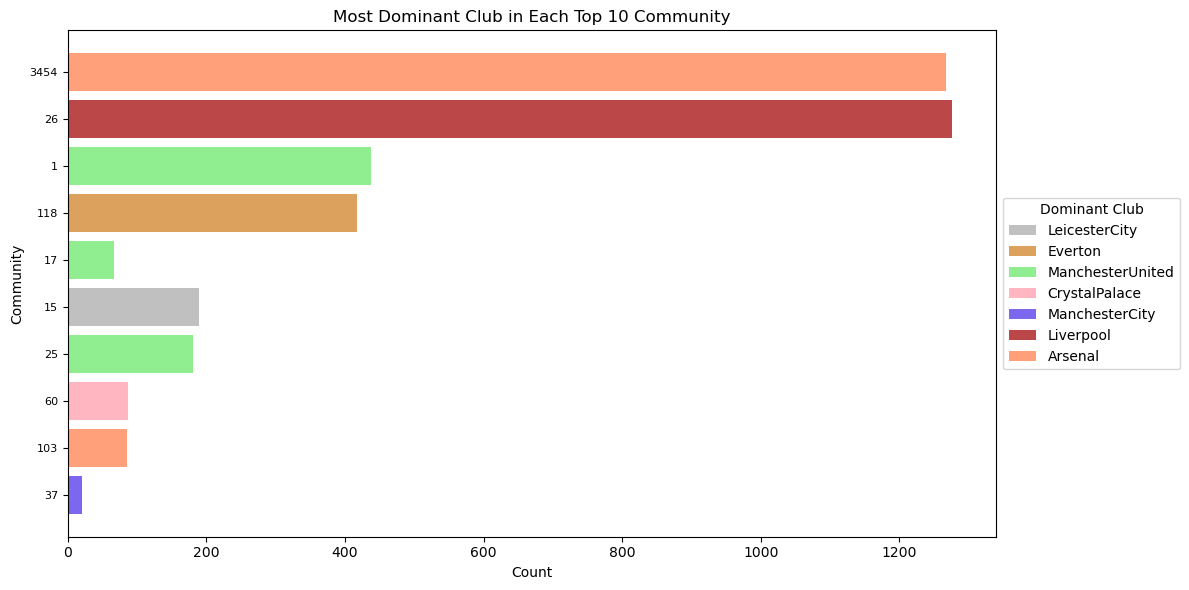

In [27]:
# Creating a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Reversing the order of communities and club counts for plotting
communities = [str(c) for c in top_10_communities['community']]
club_counts = club_counts[::-1]
dominant_clubs = dominant_clubs[::-1]

# Plotting the horizontal bar chart
ax.barh(communities, club_counts, color=[club_colors[club] for club in dominant_clubs])

# Customizing the plot
ax.set_xlabel('Count')
ax.set_ylabel('Community')
ax.set_title('Most Dominant Club in Each Top 10 Community')
ax.tick_params(axis='y', labelsize=8)  # Adjust the font size of y-axis labels

# Adding club legend
unique_dominant_clubs = set(dominant_clubs)
club_legend_handles = [plt.Rectangle((0, 0), 1, 1, fc=club_colors[club], edgecolor='none') for club in unique_dominant_clubs]
club_legend_labels = list(unique_dominant_clubs)
ax.legend(club_legend_handles, club_legend_labels, title='Dominant Club', loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)


# Adjusting layout to prevent overlapping labels
plt.tight_layout()
plt.show()

# Sentiment Analysis Using NRCLex

## Understanding the attributes and structure of the dataset <a class="anchor" id="about-dataset"></a>

### Importing the Dataset <a class="anchor" id="import-dataset"></a>

In [28]:
df = pd.read_csv("twitter-project.csv")  
df

,created_at,file_name,followers,friends,group_name,location,retweet_count,screenname,search_query,text,twitter_id,username,partition_0,partition_1
0,9/23/20 18:39,CrystalPalace,66,495,Crystal Palace FC,NaN,0,tw_footballtalk,#CrystalPalace OR #CPFC,Onto Week 2 of Premier League Stars of the Wee...,1308838436233711616,TW,EPL,CrystalPalace
1,9/23/20 18:39,CrystalPalace,0,0,Crystal Palace FC,NaN,0,crystalpalaced1,#CrystalPalace OR #CPFC,Our palace team will put our hearts out for ou...,1308838367254269954,crystalpalacedan,EPL,CrystalPalace
2,9/23/20 18:28,CrystalPalace,4292,3437,Crystal Palace FC,London,0,palaceupdates4u,#CrystalPalace OR #CPFC,Chelsea v Palace kick-off time changed and TV ...,1308835588229996545,Crystal Palace News,EPL,CrystalPalace
3,9/23/20 18:28,CrystalPalace,4292,3437,Crystal Palace FC,London,0,palaceupdates4u,#CrystalPalace OR #CPFC,Academy redevelopment update: Exclusive footag...,1308835585902116867,Crystal Palace News,EPL,CrystalPalace
4,9/23/20 18:27,CrystalPalace,0,0,Crystal Palace FC,NaN,0,crystalpalaced1,#CrystalPalace OR #CPFC,@ChelseaFC I still have no entire clue why us ...,1308835436652105728,crystalpalacedan,EPL,CrystalPalace
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211337,9/30/20 4:45,Everton,10962,12153,Everton FC,United Kingdom,0,bash_the_bookie,#Everton OR #EFC,"BTTS, Each Team Over 3 Corners &amp; Each Team...",1311165122849669120,Inplay Challenges,EPL,Everton
211338,9/30/20 4:35,Everton,3439,3277,Everton FC,Litherland,0,KevBlank9,#Everton OR #EFC,Matchday ! 💙 #UpTheToffees #EFC #COYB,1311162658687725569,Kev,EPL,Everton
211339,9/30/20 4:28,Everton,0,0,Everton FC,NaN,0,futbol_boss,#Everton OR #EFC,First post!! Come ride along and enjoy the bea...,1311160896962678785,Fútbol Boss,EPL,Everton
211340,9/30/20 4:12,Everton,31,312,Everton FC,"England, United Kingdom",1,__RobMatthews__,#Everton OR #EFC,New home on the way..... #EFC #Everton #Spirit...,1311157039389962247,Rob Matthews,EPL,Everton


### Checking out the attributes <a class="anchor" id="check-attr"></a>

In [29]:
df.columns

Index(['created_at', 'file_name', 'followers', 'friends', 'group_name',
       'location', 'retweet_count', 'screenname', 'search_query', 'text',
       'twitter_id', 'username', 'partition_0', 'partition_1'],
      dtype='object')

### Finding out of the unique football clubs from the dataset <a class="anchor" id="unique-teams"></a>

In [30]:
df['file_name'].unique()

array(['CrystalPalace', 'Chelsea', 'ManchesterUnited', 'TottenhamHotspur',
       'Arsenal', 'AFC Bournemouth', 'Burnley', 'ManchesterCity',
       'Southampton', 'LeicesterCity', 'Liverpool', 'Everton'],
      dtype=object)

## Performing NRCLex to find Sentiments in the Tweets for Each Football Club <a class="anchor" id="perform-nrclex"></a>

### Grouping the tweets based on football clubs <a class="anchor" id="group-tweets"></a>

In [31]:
grouped_tweets = df.groupby('file_name')['text'].apply(list)

In [32]:
grouped_tweets

file_name
AFC Bournemouth     [Find Adult clubs in #Bournemouth, #UnitedKing...
Arsenal             [@_sakalinho Alsooo I have to put it out there...
Burnley             [Gordon Harris #Burnley Issue 17-11-1967 https...
Chelsea             [@UberCheIseaFC Not important  As long as the ...
CrystalPalace       [Onto Week 2 of Premier League Stars of the We...
Everton             [DEBATE: Who wins the Premier League this seas...
LeicesterCity       [I have just seen that Castagne who plays for ...
Liverpool           [@RhianBrewster9 @LFC We love you always.  #YN...
ManchesterCity      [@ManCity Ali Benarbia was best #Mancity free ...
ManchesterUnited    [Dean Henderson kept his 1st United clean shee...
Southampton         [☁️ #Southampton Overcast for the hour 15°C wi...
TottenhamHotspur    [🏴󠁧󠁢󠁥󠁮󠁧󠁿Tottenham Hotspur defender Eric Dier o...
Name: text, dtype: object

### Preprocessing <a class="anchor" id="preprocessing"></a>

#### Removing Usernames, Hashtags, URL's and Punctuation from the tweets <a class="anchor" id="preprocess-remove"></a>

In [33]:
def preprocess_tweet(tweet):
    tweet = tweet.lower()
    # Removing @username mentions
    tweet = re.sub(r'@\w+', '', tweet)  
    # Removing hashtags
    tweet = re.sub(r'#\w+', '', tweet) 
    # Removing URLs
    tweet = re.sub(r'https?://\S+|www\.\S+', '', tweet)  
    # Removing punctuation
    tweet = re.sub(r'[^\w\s]', '', tweet)  
    return tweet

In [34]:
# Declaring a variable to store all the preprocessed tweets along with football clubs
processed_tweets = {}
for team, tweets in grouped_tweets.items():
    # Running each Iteration on the football clubs 
    for tweet in tweets:
        # Running each Iteration on tweets of the football club
        
        # Preprocess the tweet
        preprocessed_tweet = preprocess_tweet(tweet)
        
        if team not in processed_tweets:
            # If football club is not present in the dictionary, then add the football club along with first tweet 
            processed_tweets[team] = [preprocessed_tweet]
        else:
            # If football club is present in the dictionary, then append the tweet to the existing tweet list
            processed_tweets[team].append(preprocessed_tweet)

In [35]:
processed_tweets

{'AFC Bournemouth': ['find adult clubs in   on ',
  'now on air  the sunday supplement with gary plummer  join gary for great music and chat to end the week  sunday 20th september 2020  2030  2300        ',
  ' team issue 3131967 ',
  'now on air  sunday request show with adrian boyd terry drewett amp karen wye  90 mins of requests for a sunday afternoon  sunday 20th september 2020  1900  2030        ',
  ' departing  pier for the last trip of the day warm afternoon max 24c   ',
  'night night from    ',
  '  had a small crowd but still paid out for players',
  'now on air  ikidz request hour with adrian boyd amp terry drewett  an hour of requests for our younger listeners  sunday 20th september 2020  1800  1900        ',
  '5 cruise ships in poole bay this afternoon            ',
  'our  active in mind support group now takes place virtually join us every monday tomorrow from 24pm register with us via email at adultwellbeingservicesuk our full timetable can be found at      ',
  ' loo

#### Removing Stopwords from the tweets <a class="anchor" id="remove-stopwords"></a>

In [36]:
stop_words = set(stopwords.words('english'))

negationWords = {'no', 'not', 'doesn','haven', "didn't", 'isn', 't', 'didn', "don't", 'ain', 'hasn', 'needn', 'needn', 'wasn', 'couldn', 'aren', 'weren', 'hadn', 'wouldn', 'mustn', 'mightn', 'shouldn', "doesn't", "hadn't", "haven't", "isn't", "mightn't", "mustn't", "needn't", "shan't", "shouldn't", "wasn't", "weren't", "won't", "wouldn't", "couldn't", "aren't", "hasn't", 'd', 's', 've', 'y', 're', 'o', 'm', 'ma'}

#Excluding the negation words from the Stopwords list
stop_words = stop_words - negationWords 
print(stop_words)

{'ours', 'had', 'more', 'while', 'll', 'until', "that'll", 'both', 'by', 'won', 'those', 'doing', 'against', 'just', 'as', 'these', 'to', 'has', 'shan', 'herself', 'been', 'any', 'theirs', 'don', 'few', 'for', 'yourself', 'once', 'am', 'how', 'between', 'we', 'most', 'he', 'so', 'when', 'of', 'if', 'because', 'me', 'having', 'what', 'this', 'below', 'her', 'our', 'does', "you'll", 'your', 'a', 'an', "she's", "you're", 'over', 'further', 'down', 'themselves', 'each', 'after', 'through', 'about', 'up', 'his', 'do', 'above', 'have', 'than', 'them', 'only', 'him', 'himself', 'itself', 'where', 'such', 'some', 'nor', 'or', 'yourselves', 'is', 'their', 'under', 'before', 'i', "should've", 'will', 'now', 'with', 'same', 'myself', "you've", 'are', "you'd", 'why', 'be', 'out', 'but', 'there', 'they', 'who', 'that', 'during', 'were', 'the', 'it', 'my', 'from', 'you', 'then', 'should', 'other', 'into', 'did', 'and', 'whom', 'all', 'was', 'hers', 'can', 'its', 'very', 'here', 'own', 'which', 'off'

In [37]:
# Converting the processed_tweets to Pandas.Series datatype
processed_tweets = pd.Series(processed_tweets)

In [38]:
processed_tweets

AFC Bournemouth     [find adult clubs in   on , now on air  the su...
Arsenal             [ alsooo i have to put it out there i love my ...
Burnley             [gordon harris  issue 17111967  , burnley alre...
Chelsea             [ not important  as long as the other 9 outfie...
CrystalPalace       [onto week 2 of premier league stars of the we...
Everton             [debate who wins the premier league this seaso...
LeicesterCity       [i have just seen that castagne who plays for ...
Liverpool           [  we love you always  , big game for us today...
ManchesterCity      [ ali benarbia was best  free signing amp best...
ManchesterUnited    [dean henderson kept his 1st united clean shee...
Southampton         [  overcast for the hour 15c with cloudy rain ...
TottenhamHotspur    [tottenham hotspur defender eric dier on jose ...
dtype: object

In [39]:
# Declaring a variable to store the tweets after preprocessing(cleaning all data)
filtered_tweets = {}

for team, tweets in processed_tweets.items():
    # Running each Iteration on the football clubs 
    for tweet in tweets:
        # Running each Iteration on tweets of the football club
        
        #Tokenizing the words in the tweet
        words = word_tokenize(tweet)
        
        # Removing Stopwords from the tweet
        filtered_words = [word for word in words if word.lower() not in stop_words]
        
        # Joining the words with space and converting it to string
        filtered_tweet = ' '.join(filtered_words)
        if team not in filtered_tweets:
             # If football club is not present in the dictionary, then add the football club along with first filtered tweet
            filtered_tweets[team] = [filtered_tweet]
        else:
            # If football club is present in the dictionary, then append the filtered tweet to the existing tweet list
            filtered_tweets[team].append(filtered_tweet)

In [40]:
# Converting the filtered_tweets to Pandas.Series datatype
filtered_tweets = pd.Series(filtered_tweets)

In [41]:
filtered_tweets

AFC Bournemouth     [find adult clubs, air sunday supplement gary ...
Arsenal             [alsooo put love team fan havent truly happy c...
Burnley             [gordon harris issue 17111967, burnley already...
Chelsea             [not important long 9 outfield players mark mi...
CrystalPalace       [onto week 2 premier league stars week analyse...
Everton             [debate wins premier league season gets top 4,...
LeicesterCity       [seen castagne plays starting today midfieldwi...
Liverpool           [love always, big game us today tough away dec...
ManchesterCity      [ali benarbia best free signing amp best man p...
ManchesterUnited    [dean henderson kept 1st united clean sheet 1s...
Southampton         [overcast hour 15c cloudy rain starting evenin...
TottenhamHotspur    [tottenham hotspur defender eric dier jose mou...
dtype: object

### Applying NRCLex model to find out the emotions of the tweet and plot them <a class="anchor" id="plot-nrclex"></a>

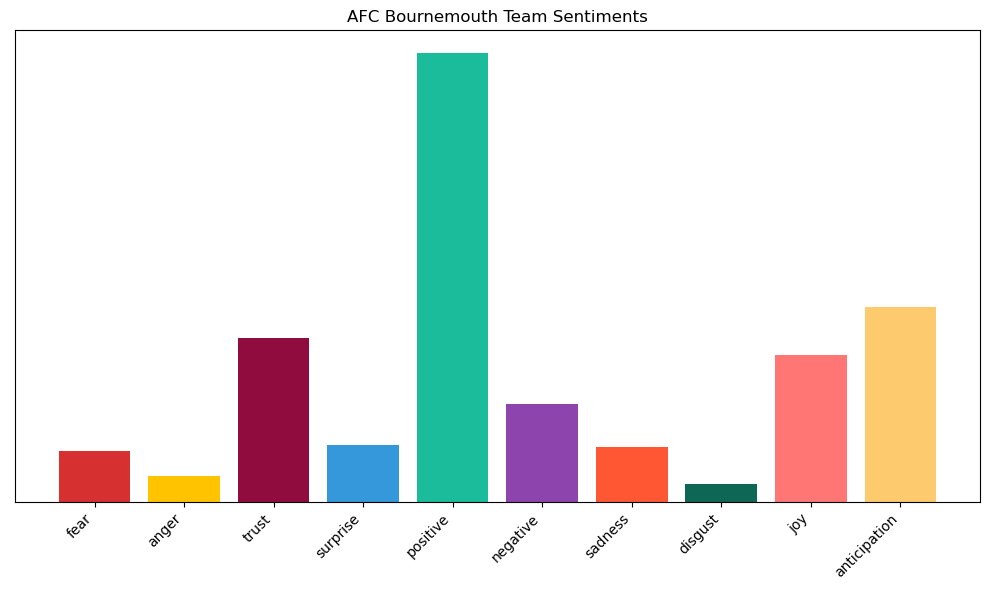

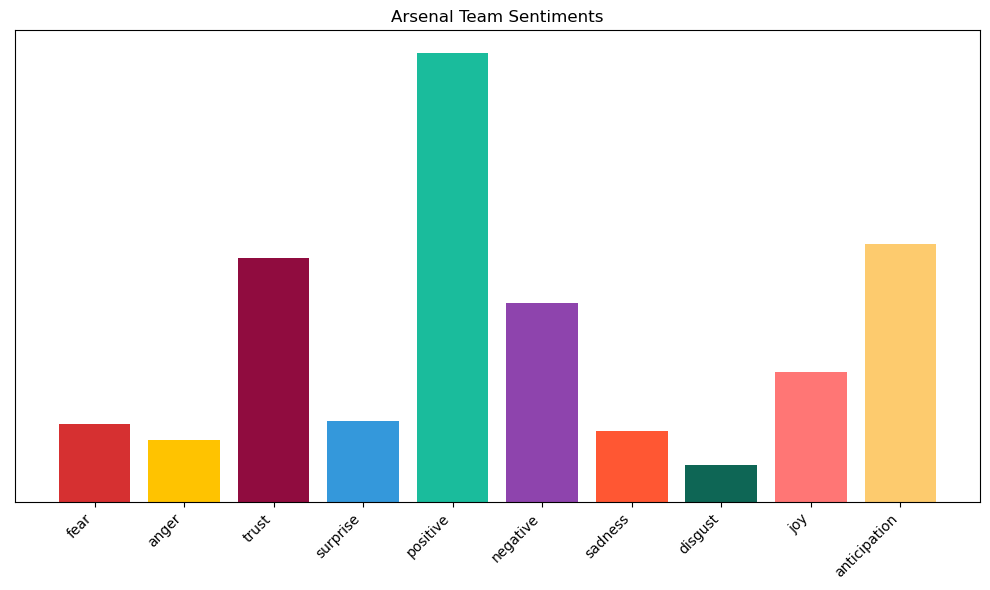

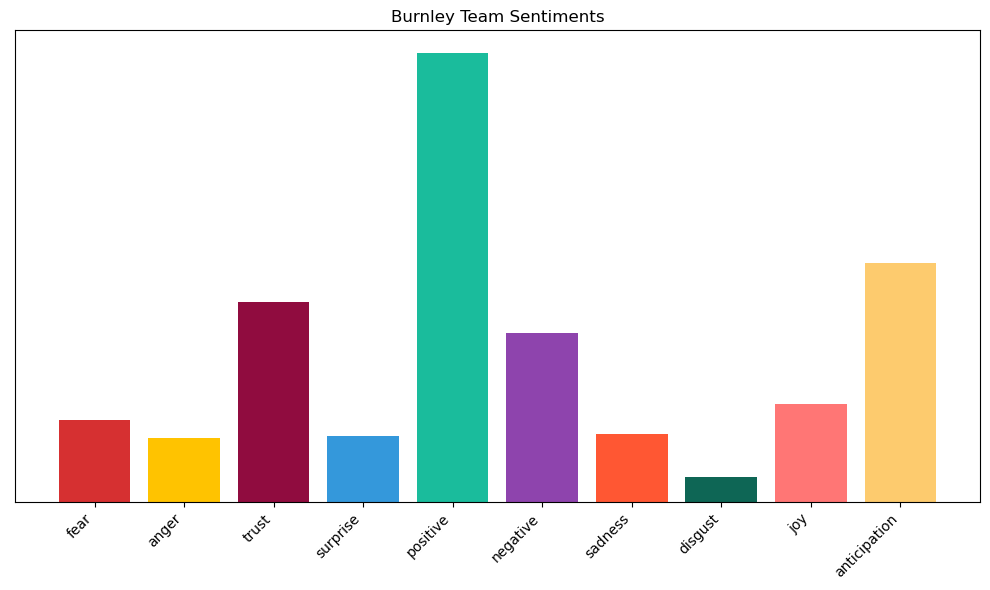

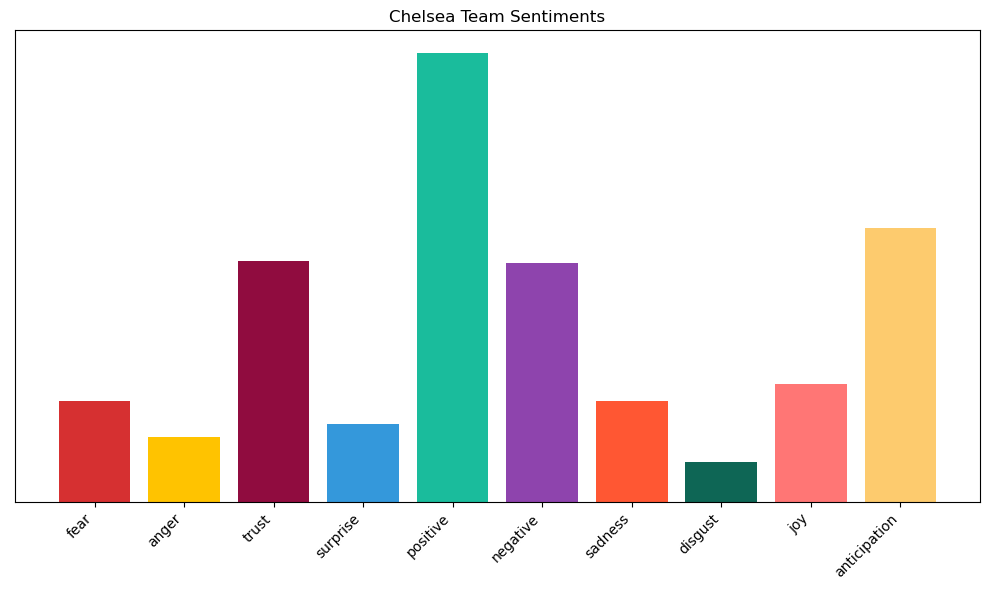

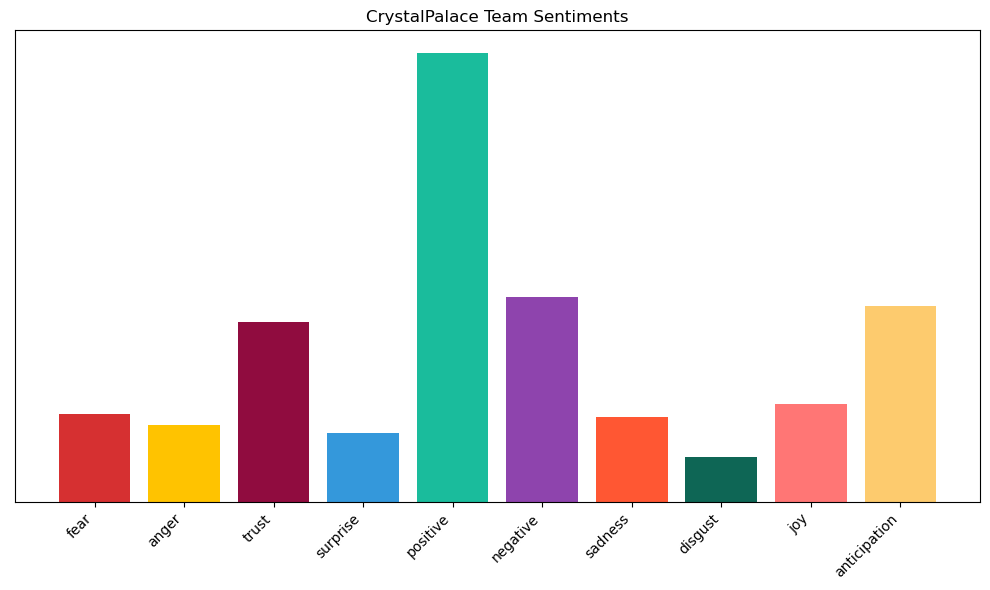

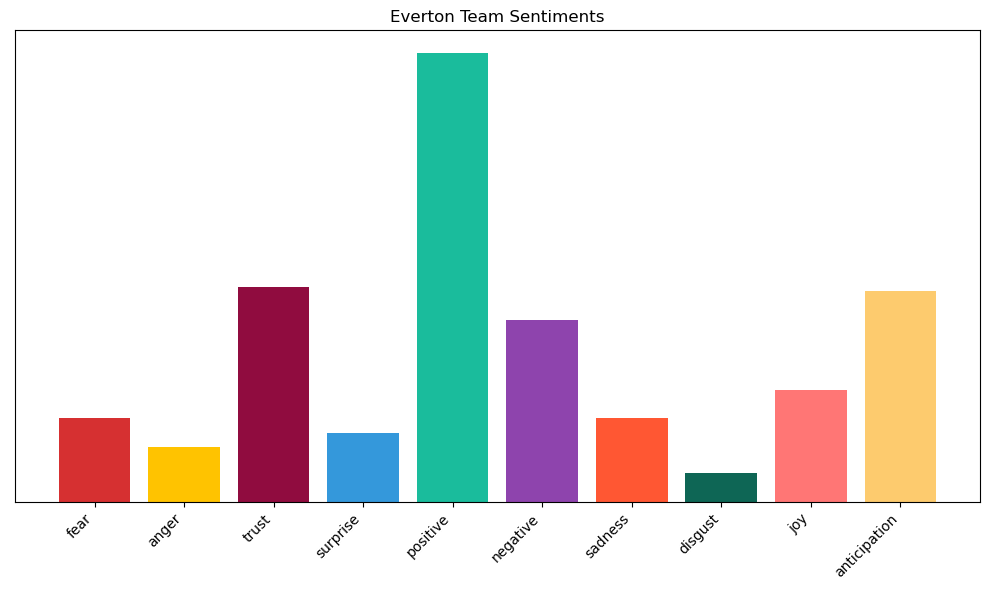

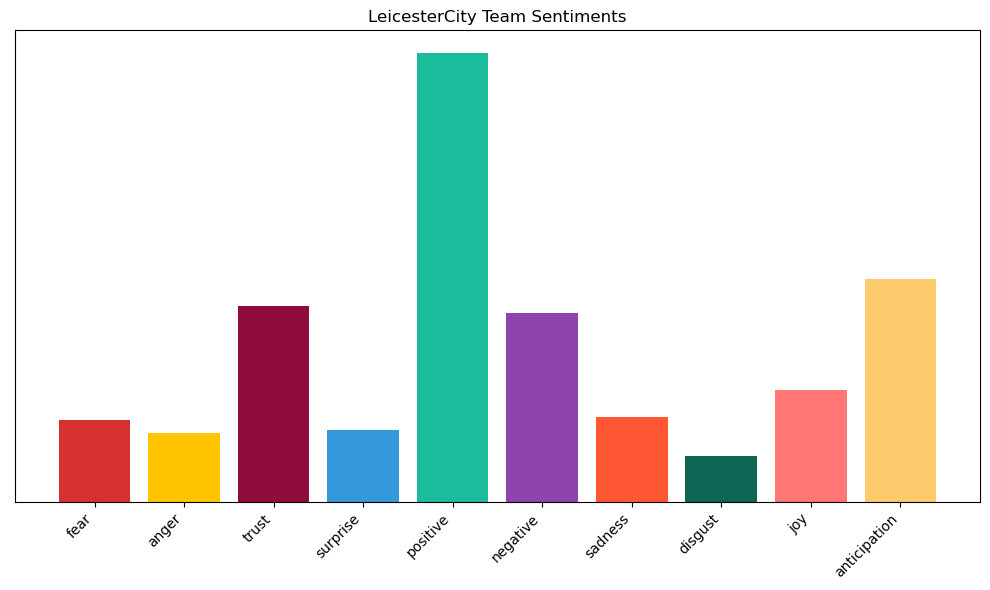

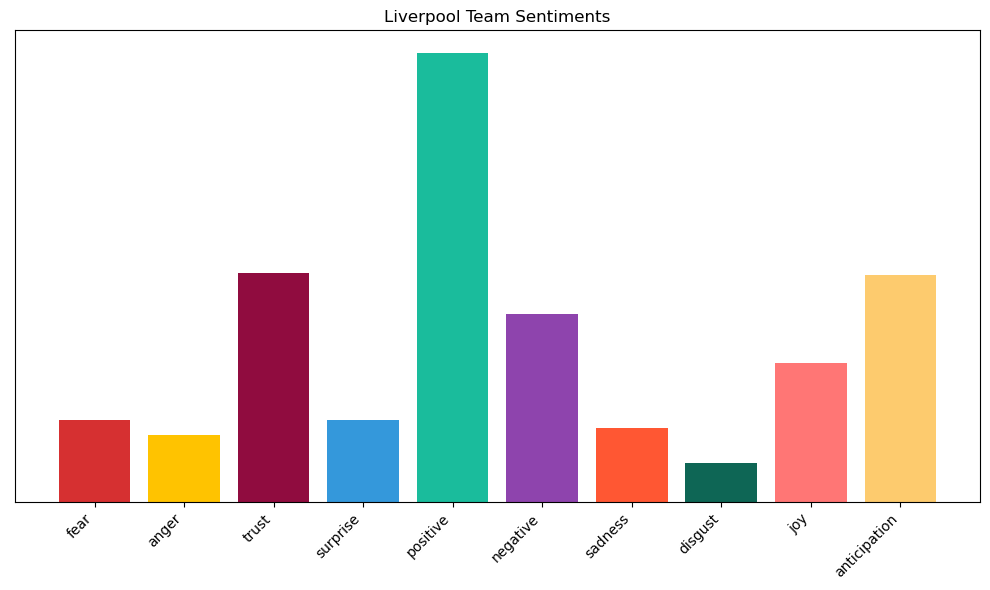

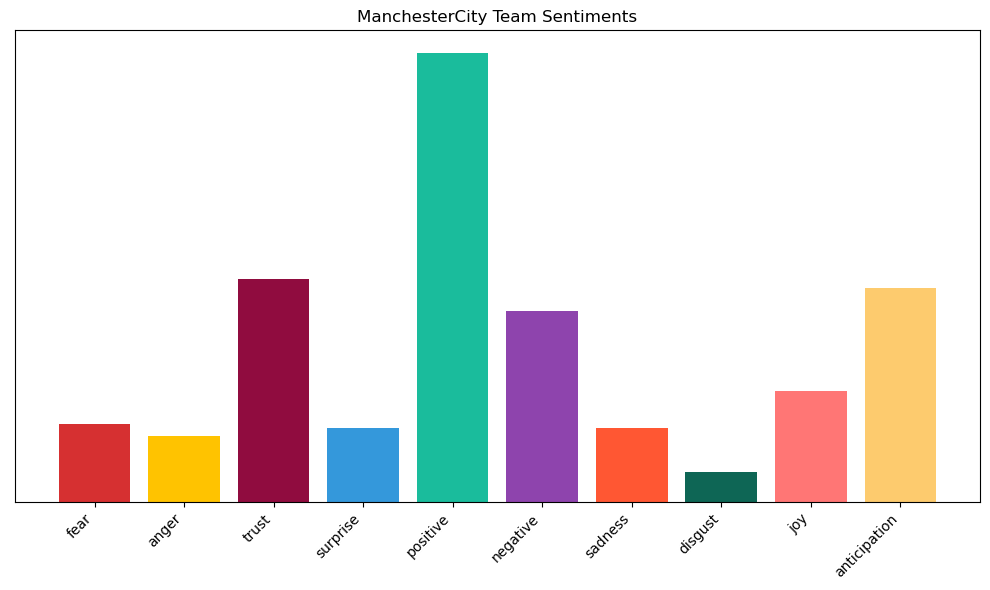

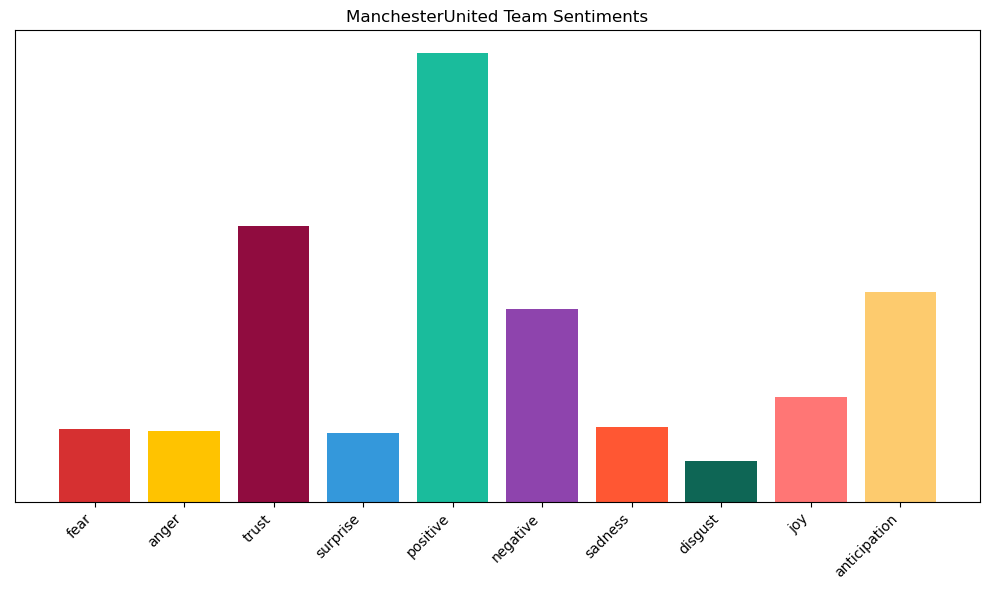

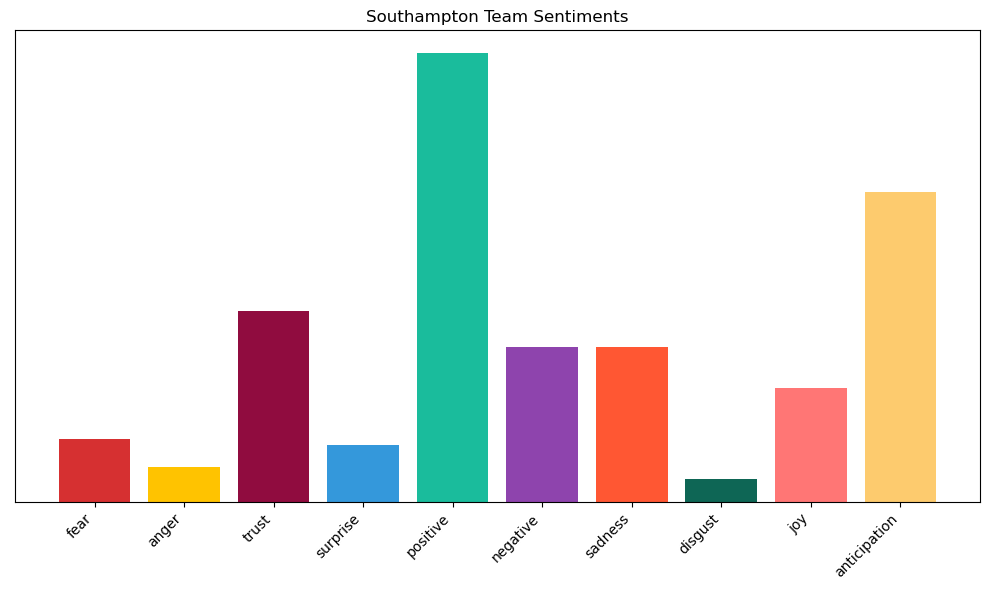

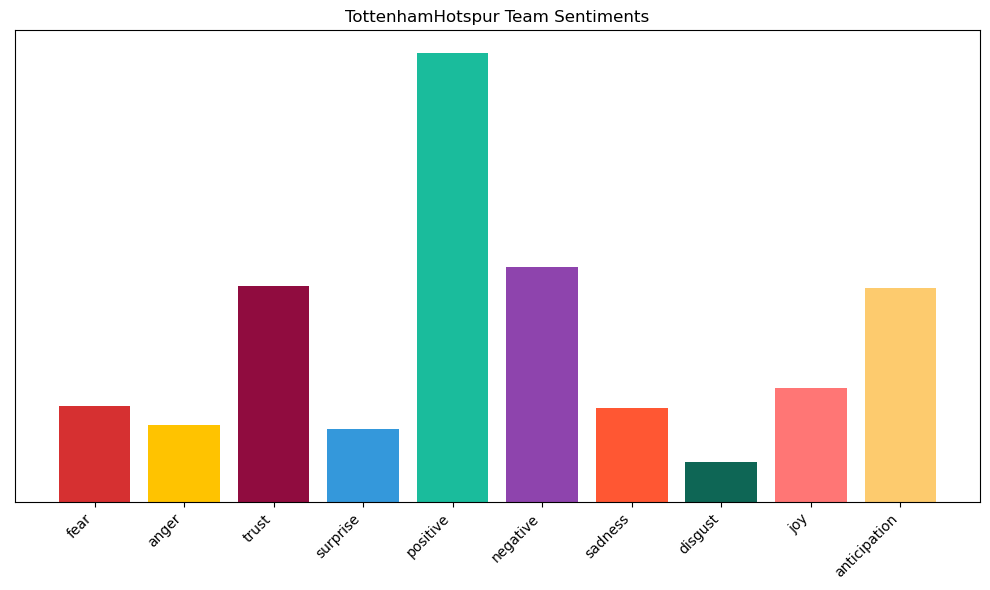

In [42]:
# Defining colors for each emotion to plot on the graph
emotion_colors = {
    'fear': '#d63031',     
    'anger': '#FFC300',     
    'anticipation': '#fdcb6e',   
    'trust': '#900C3F',     
    'surprise': '#3498DB',  
    'positive': '#1ABC9C',  
    'negative': '#8E44AD',  
    'sadness': '#FF5733',   
    'disgust': '#0E6655',   
    'joy': '#ff7675'
}

for team, texts in filtered_tweets.items():
    # Running each Iteration on the football clubs
    
    # Variable for storing the emotions of the tweets
    emotions = []
    # Variable for storing the tweets
    tweets = []
    for tweet in texts:
        # Running each Iteration on tweets of the football club
        
        # Performing NRCLex Model on the tweet
        emotion = NRCLex(tweet)
        # Finding different type of emotions present in the tweet along with their scores and adding it to the emotions variable
        emotions.append(emotion.affect_frequencies)
        # Adding the tweet to the tweets variable
        tweets.append(tweet)
    
    # Create a list of emotion labels from the Modelled tweets
    if(team == "ManchesterUnited" or team == "Burnley" or team == "LeicesterCity" or team == "ManchesterCity" or
      team == "Liverpool"):
        emotion_labels = list(emotions[3].keys())
    elif(team == "AFC Bournemouth"):
        emotion_labels = list(emotions[9].keys())
    else:
        emotion_labels = list(emotions[0].keys())
    emotion_labels.remove('anticip')
    
    # Calculating the average score for each emotion across all tweets
    emotion_scores = {label: sum(emotion.get(label, 0) for emotion in emotions) for label in emotion_labels}
    
    # Ploting the emotion scores 
    fig, ax = plt.subplots(figsize=(10, 6))
    x = range(len(emotion_labels))
    
    for i, label in enumerate(emotion_labels):
        ax.bar(i, emotion_scores[label], color=emotion_colors.get(label, 'yellow'))
    ax.set_xticks(x)
    ax.set_xticklabels(emotion_labels, rotation=45, ha='right')
    ax.set_yticks([])  
    ax.set_title(str(team)+' Team Sentiments')
    plt.tight_layout()
    plt.show()

# Influence of Geographic Location

## Cleaning the Location attribute <a class="anchor" id="clean-location"></a>

### Removing the rows which have null values <a class="anchor" id="remove-null"></a>

In [43]:
# Removing rows with missing location values
df = df.dropna(subset=['location'])

### Removing the rows with values containing special characters except ',' <a class="anchor" id="remove-special"></a>

In [44]:
# Removing rows with values containing special characters except ','
df = df[~df['location'].str.contains(r'[^a-zA-Z0-9,]')]

In [45]:
df

,created_at,file_name,followers,friends,group_name,location,retweet_count,screenname,search_query,text,twitter_id,username,partition_0,partition_1
2,9/23/20 18:28,CrystalPalace,4292,3437,Crystal Palace FC,London,0,palaceupdates4u,#CrystalPalace OR #CPFC,Chelsea v Palace kick-off time changed and TV ...,1308835588229996545,Crystal Palace News,EPL,CrystalPalace
3,9/23/20 18:28,CrystalPalace,4292,3437,Crystal Palace FC,London,0,palaceupdates4u,#CrystalPalace OR #CPFC,Academy redevelopment update: Exclusive footag...,1308835585902116867,Crystal Palace News,EPL,CrystalPalace
19,9/23/20 17:38,CrystalPalace,105,123,Crystal Palace FC,London,0,FBFacepaints,#CrystalPalace OR #CPFC,"Bunnies &amp; flowers, 2 of my favourite thing...",1308823127279968259,Sarah Haram,EPL,CrystalPalace
32,9/23/20 16:46,CrystalPalace,4322,4636,Crystal Palace FC,Newmarket,0,gazbod,#CrystalPalace OR #CPFC,Roy’s outside of the foot pass ❤️💙😎 #CPFC http...,1308810085817298944,GazBod,EPL,CrystalPalace
40,9/23/20 16:13,CrystalPalace,391,528,Crystal Palace FC,Surrey,0,SurreyStandards,#CrystalPalace OR #CPFC,"Once, my favourite #CPFC player https://t.co/o...",1308801778788585472,Surreyite,EPL,CrystalPalace
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211330,9/30/20 5:35,Everton,11919,12864,Everton FC,Everton,0,TOFnews,#Everton OR #EFC,Coleman to stay skipper - https://t.co/1FapHFU...,1311177940101668865,Toffee News,EPL,Everton
211332,9/30/20 5:20,Everton,11919,12864,Everton FC,Everton,0,TOFnews,#Everton OR #EFC,Everton news and transfers LIVE - Jean-Clair T...,1311174042741809152,Toffee News,EPL,Everton
211333,9/30/20 5:20,Everton,11919,12864,Everton FC,Everton,0,TOFnews,#Everton OR #EFC,Wolves €15m bid for Everton-linked Brazilian s...,1311174014732206080,Toffee News,EPL,Everton
211334,9/30/20 5:20,Everton,61295,2099,Everton FC,Liverpool,0,LivEchoEFC,#Everton OR #EFC,#EFC LIVE - updates throughout the day on all ...,1311173930972053504,Everton FC News,EPL,Everton


## Finding the continent based on the Location Attribute <a class="anchor" id="find-continent"></a>

### Funciton for finding the continent of the given location using GeoLocator <a class="anchor" id="get-continent"></a>

In [46]:
# Initializing geolocator
geolocator = Nominatim(user_agent="my_app")

def get_continent(location):
    try:
        if location in ['Africa','Asia','Europe','North America','Australia','South America']:
            return location
        # Using Nominatim to get location information
        location_info = geolocator.geocode(location, language='en', timeout=10)
        if location_info:
            # Extracting the continent from the address
            address_parts = location_info.address.split(', ')
            country = address_parts[-1].strip()
            country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
            continent_name = pc.country_alpha2_to_continent_code(country_code)
            
            # Maping the country to its continent
            continent_map = {
                'AF': 'Africa',
                'AS': 'Asia',
                'EU': 'Europe',
                'NA': 'North America',
                'OC': 'Australia',
                'SA': 'South America'
            }
            return continent_map.get(continent_name, 'Unknown')
        else:
            return 'Unknown'
    except GeocoderTimedOut:
        return 'Unknown'
    except:
        return 'Unknown'


### Finding continent names for the unique locations of the dataset <a class="anchor" id="unique-location"></a>

In [47]:
unique_locations = df['location'].unique()

# A dictionary to store the continent for each unique location
continent_dict = {}

# Iterating over unique locations and apply the get_continent function
for location in unique_locations:
    continent = get_continent(str(location))
    continent_dict[location] = continent

### Applying the continent names to the dataset <a class="anchor" id="apply-dataset"></a>

In [48]:
df['continent'] = df['location'].map(continent_dict)

### Removing all the rows where continent name is Uknown <a class="anchor" id="remove-unknown"></a>

In [49]:
# Removing rows where 'continent' is 'Unknown'
df = df[df['continent'] != 'Unknown']

In [50]:
df = df.reset_index(drop=True)

In [51]:
df['continent'].unique()

array(['Europe', 'Africa', 'North America', 'Asia', 'South America',
       'Australia'], dtype=object)

In [52]:
df

,created_at,file_name,followers,friends,group_name,location,retweet_count,screenname,search_query,text,twitter_id,username,partition_0,partition_1,continent
0,9/23/20 18:28,CrystalPalace,4292,3437,Crystal Palace FC,London,0,palaceupdates4u,#CrystalPalace OR #CPFC,Chelsea v Palace kick-off time changed and TV ...,1308835588229996545,Crystal Palace News,EPL,CrystalPalace,Europe
1,9/23/20 18:28,CrystalPalace,4292,3437,Crystal Palace FC,London,0,palaceupdates4u,#CrystalPalace OR #CPFC,Academy redevelopment update: Exclusive footag...,1308835585902116867,Crystal Palace News,EPL,CrystalPalace,Europe
2,9/23/20 17:38,CrystalPalace,105,123,Crystal Palace FC,London,0,FBFacepaints,#CrystalPalace OR #CPFC,"Bunnies &amp; flowers, 2 of my favourite thing...",1308823127279968259,Sarah Haram,EPL,CrystalPalace,Europe
3,9/23/20 16:46,CrystalPalace,4322,4636,Crystal Palace FC,Newmarket,0,gazbod,#CrystalPalace OR #CPFC,Roy’s outside of the foot pass ❤️💙😎 #CPFC http...,1308810085817298944,GazBod,EPL,CrystalPalace,Europe
4,9/23/20 16:13,CrystalPalace,391,528,Crystal Palace FC,Surrey,0,SurreyStandards,#CrystalPalace OR #CPFC,"Once, my favourite #CPFC player https://t.co/o...",1308801778788585472,Surreyite,EPL,CrystalPalace,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40054,9/30/20 5:35,Everton,11919,12864,Everton FC,Everton,0,TOFnews,#Everton OR #EFC,Coleman to stay skipper - https://t.co/1FapHFU...,1311177940101668865,Toffee News,EPL,Everton,Europe
40055,9/30/20 5:20,Everton,11919,12864,Everton FC,Everton,0,TOFnews,#Everton OR #EFC,Everton news and transfers LIVE - Jean-Clair T...,1311174042741809152,Toffee News,EPL,Everton,Europe
40056,9/30/20 5:20,Everton,11919,12864,Everton FC,Everton,0,TOFnews,#Everton OR #EFC,Wolves €15m bid for Everton-linked Brazilian s...,1311174014732206080,Toffee News,EPL,Everton,Europe
40057,9/30/20 5:20,Everton,61295,2099,Everton FC,Liverpool,0,LivEchoEFC,#Everton OR #EFC,#EFC LIVE - updates throughout the day on all ...,1311173930972053504,Everton FC News,EPL,Everton,Europe


## Sentiment Analysis

### Grouping the tweets by continent <a class="anchor" id="group-tweet"></a>

In [53]:
# Grouping the tweets by continent
grouped_tweets = df.groupby('continent')['text'].apply(list)

In [54]:
grouped_tweets

continent
Africa           [@Phillmoore85 @gazbod @footballdaily @SkyAnto...
Asia             [First official goal @TimoWerner  #timowerner ...
Australia        [📝 — Manchester United are looking to sign a n...
Europe           [Chelsea v Palace kick-off time changed and TV...
North America    [“I know for a fact taking the knee has helped...
South America    [This one I don’t get, he can’t defend, but he...
Name: text, dtype: object

### Preprocessing the tweets <a class="anchor" id="preprocessing-tweets"></a>

#### Removing Stopwords from the tweets <a class="anchor" id="remove-stopword"></a>

In [55]:
stop_words = set(stopwords.words('english'))

negationWords = {'no', 'not', 'doesn','haven', "didn't", 'isn', 't', 'didn', "don't", 'ain', 'hasn', 'needn', 'needn', 'wasn', 'couldn', 'aren', 'weren', 'hadn', 'wouldn', 'mustn', 'mightn', 'shouldn', "doesn't", "hadn't", "haven't", "isn't", "mightn't", "mustn't", "needn't", "shan't", "shouldn't", "wasn't", "weren't", "won't", "wouldn't", "couldn't", "aren't", "hasn't", 'd', 's', 've', 'y', 're', 'o', 'm', 'ma'}

# Removing negation words from the list
stop_words = stop_words - negationWords 
print(stop_words)

{'ours', 'had', 'more', 'while', 'll', 'until', "that'll", 'both', 'by', 'won', 'those', 'doing', 'against', 'just', 'as', 'these', 'to', 'has', 'shan', 'herself', 'been', 'any', 'theirs', 'don', 'few', 'for', 'yourself', 'once', 'am', 'how', 'between', 'we', 'most', 'he', 'so', 'when', 'of', 'if', 'because', 'me', 'having', 'what', 'this', 'below', 'her', 'our', 'does', "you'll", 'your', 'a', 'an', "she's", "you're", 'over', 'further', 'down', 'themselves', 'each', 'after', 'through', 'about', 'up', 'his', 'do', 'above', 'have', 'than', 'them', 'only', 'him', 'himself', 'itself', 'where', 'such', 'some', 'nor', 'or', 'yourselves', 'is', 'their', 'under', 'before', 'i', "should've", 'will', 'now', 'with', 'same', 'myself', "you've", 'are', "you'd", 'why', 'be', 'out', 'but', 'there', 'they', 'who', 'that', 'during', 'were', 'the', 'it', 'my', 'from', 'you', 'then', 'should', 'other', 'into', 'did', 'and', 'whom', 'all', 'was', 'hers', 'can', 'its', 'very', 'here', 'own', 'which', 'off'

#### Removing Usernames, Hashtags, URL's and Punctuation from the tweets <a class="anchor" id="remove-url"></a>

In [56]:
def preprocess_tweet(tweet):
    tweet = tweet.lower()
    # Removing @username mentions
    tweet = re.sub(r'@\w+', '', tweet)  
    # Removing hashtags
    tweet = re.sub(r'#\w+', '', tweet)  
    # Removing URLs
    tweet = re.sub(r'https?://\S+|www\.\S+', '', tweet)  
    # Removing punctuation
    tweet = re.sub(r'[^\w\s]', '', tweet)  
    
    # Lemmatizing the tokens
    words = word_tokenize(tweet)
    
    # Removing stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_tweet = ' '.join(filtered_words)
    return filtered_tweet

### Performing Sentiment Analysis and calculating sentiment scores for each continent using VADER <a class="anchor" id="sentiment-vader"></a>

In [57]:
# Initializing the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Storing the sentiment scores for each continent
sentiment_scores = []

# Performing sentiment analysis for each continent
for continent, tweets in grouped_tweets.items():
    continent_scores = []
    
    # Preprocessing and performing sentiment analysis for each tweet
    for tweet in tweets:
        preprocessed_tweet = preprocess_tweet(tweet)
        sentiment_score = analyzer.polarity_scores(preprocessed_tweet)
        continent_scores.append(sentiment_score)
    
    # Calculating the average sentiment scores for the current continent
    avg_sentiment_scores = pd.DataFrame(continent_scores).mean()
    
    # Storing the sentiment scores for the current continent
    sentiment_scores.append((continent, avg_sentiment_scores))
    
    # Printing the sentiment analysis results for the current continent
    print(f"Sentiment Analysis for Continent: {continent}")
    print("Average Sentiment Scores:")
    print("Positive:", avg_sentiment_scores['pos'])
    print("Neutral:", avg_sentiment_scores['neu'])
    print("Negative:", avg_sentiment_scores['neg'])
    print("Compound:", avg_sentiment_scores['compound'])
    print("\n")

Sentiment Analysis for Continent: Africa
Average Sentiment Scores:
Positive: 0.21728676609401545
Neutral: 0.7016129884840451
Negative: 0.07940211440437984
Compound: 0.21046667925240622


Sentiment Analysis for Continent: Asia
Average Sentiment Scores:
Positive: 0.21378085426057078
Neutral: 0.6973459969950596
Negative: 0.07878729341060323
Compound: 0.19984346426271715


Sentiment Analysis for Continent: Australia
Average Sentiment Scores:
Positive: 0.2081570717839377
Neutral: 0.7299076048329788
Negative: 0.061945273631840846
Compound: 0.2508314143567879


Sentiment Analysis for Continent: Europe
Average Sentiment Scores:
Positive: 0.18802431433573394
Neutral: 0.7309466640731391
Negative: 0.08021163197821404
Compound: 0.16532044738377716


Sentiment Analysis for Continent: North America
Average Sentiment Scores:
Positive: 0.2156093073593074
Neutral: 0.6940468975468969
Negative: 0.08817640692640683
Compound: 0.19396197691197684


Sentiment Analysis for Continent: South America
Average Sen

### Plotting the sentiment scores on the world map using GeoPandas <a class="anchor" id="world-map"></a>

/var/folders/w3/rtcs4_w57zd0q2z2xl13sgzc0000gn/T/ipykernel_1683/1837366220.py:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


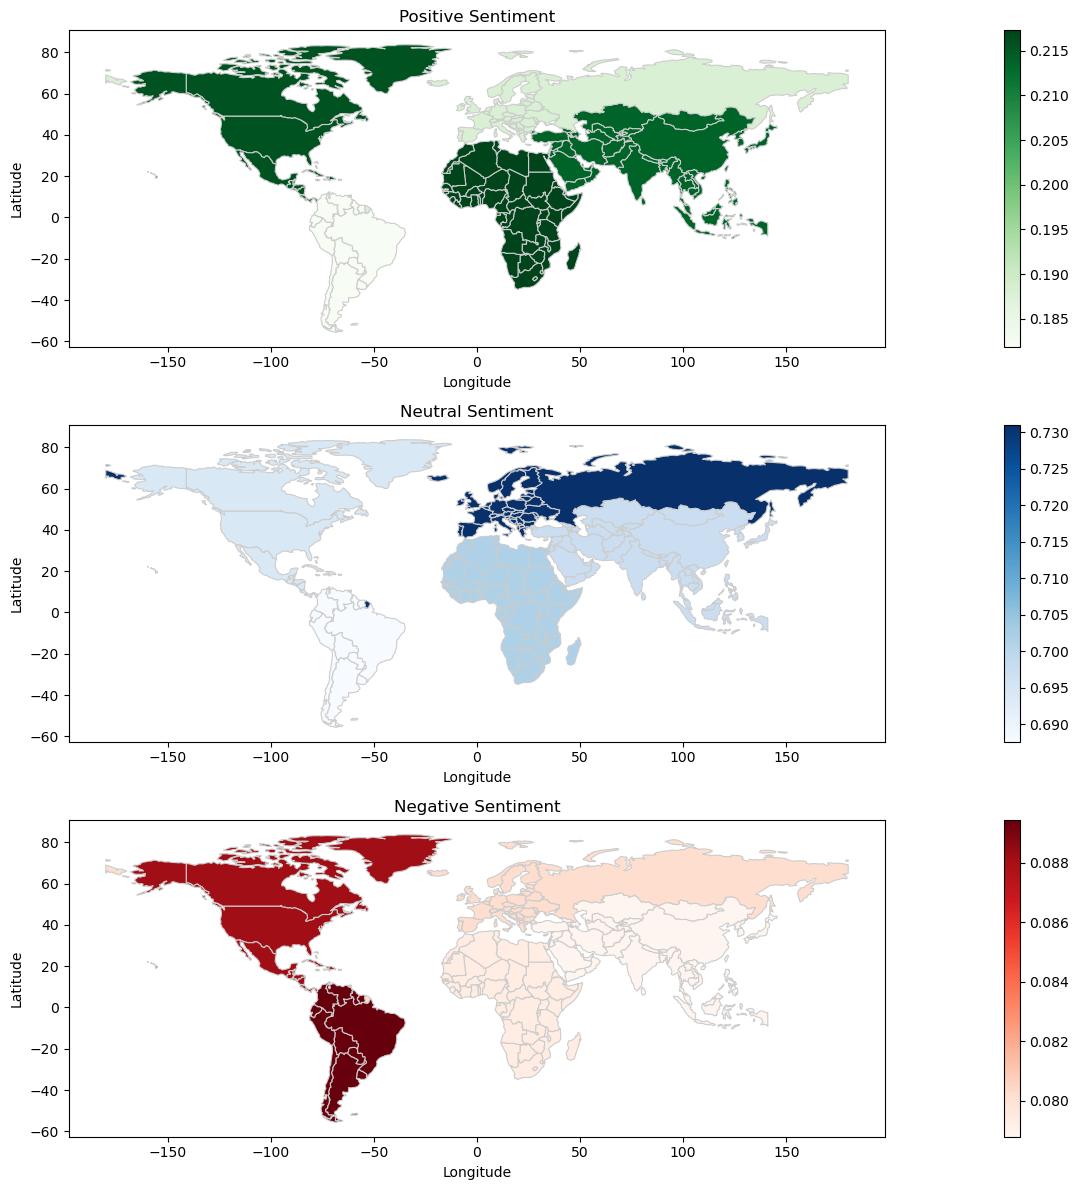

In [58]:
# Extracting the data for plotting
continents = [score[0] for score in sentiment_scores]
positive_scores = [score[1]['pos'] for score in sentiment_scores]
neutral_scores = [score[1]['neu'] for score in sentiment_scores]
negative_scores = [score[1]['neg'] for score in sentiment_scores]

# Creating a DataFrame with the sentiment scores
sentiment_df = pd.DataFrame({
    'Continent': continents,
    'Positive': positive_scores,
    'Neutral': neutral_scores,
    'Negative': negative_scores
})

# Loading the world map shapefile
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merging the sentiment scores with the world map based on the continent names
merged_data = world_map.merge(sentiment_df, left_on='continent', right_on='Continent', how='left')

# Creating subplots for each sentiment category
fig, axes = plt.subplots(3, 1, figsize=(24, 12))

# Plotting the choropleth map for each sentiment category
sentiment_categories = ['Positive', 'Neutral', 'Negative']
colors = ['Greens', 'Blues', 'Reds']

for i, category in enumerate(sentiment_categories):
    ax = axes[i]
    merged_data.plot(column=category, cmap=colors[i], linewidth=0.8, edgecolor='0.8', ax=ax, legend=True)
    ax.set_title(f'{category} Sentiment')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
# Adjusting the spacing between subplots
plt.tight_layout()
# Displaying the plot
plt.show()


### Plotting the sentiment scores on the HeatMap <a class="anchor" id="heat-map"></a>

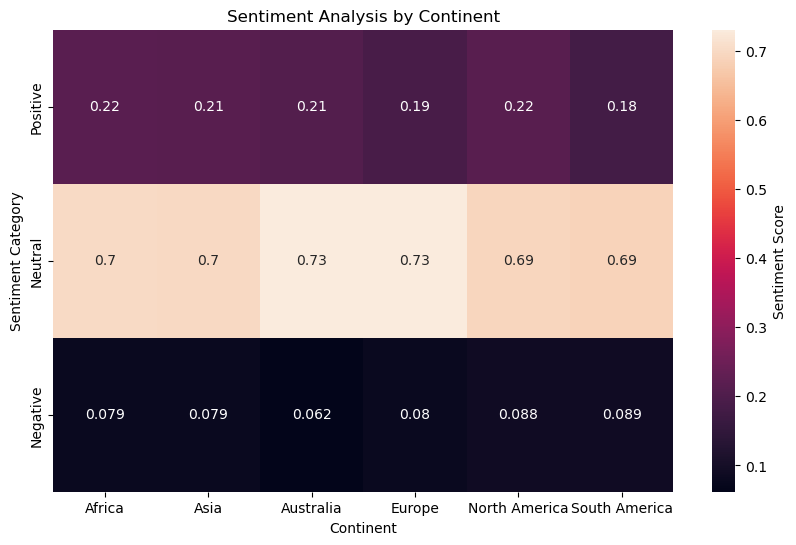

In [60]:
# Reshaping the DataFrame to have continents as columns and sentiment categories as rows
sentiment_scores_reshaped = sentiment_df.set_index('Continent').T

# Creating a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(sentiment_scores_reshaped, annot=True, cbar_kws={'label': 'Sentiment Score'})
plt.ylabel('Sentiment Category')
plt.title('Sentiment Analysis by Continent')
plt.show()

### Plotting the sentiment scores over a period of time <a class="anchor" id="time-period"></a>

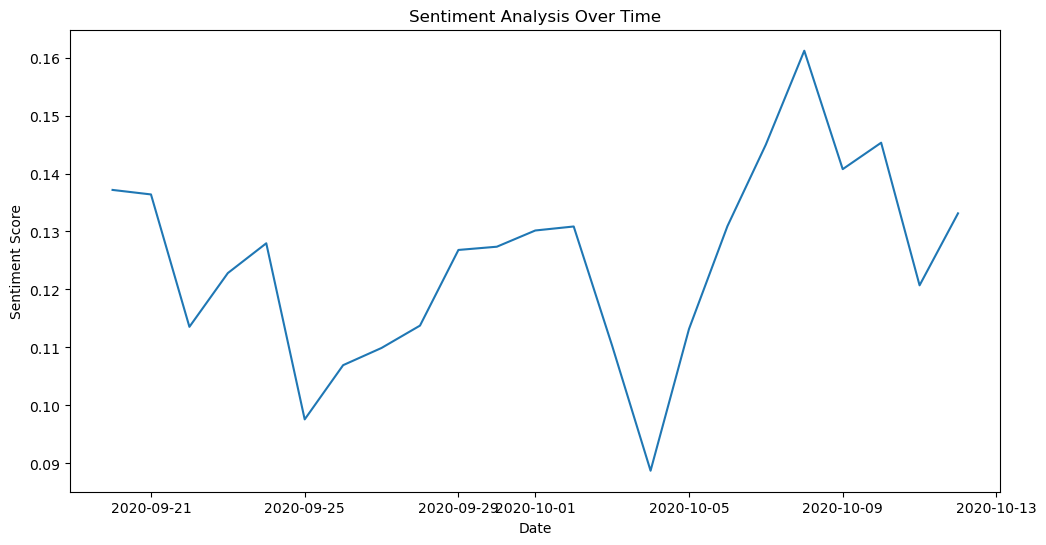

In [61]:
# Converting the 'Date' column to datetime if it's not already in that format
df['created_at'] = pd.to_datetime(df['created_at'])

# Function to calculate sentiment score using TextBlob
def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    return analysis.sentiment.polarity

# Calculating sentiment score for each tweet
df['Sentiment'] = df['text'].apply(get_sentiment)

# Definiing colors for each football club
team_colors = ['#f3a683', '#f7d794', '#778beb', '#e77f67', '#cf6a87', '#596275', '#f8a5c2', 
               '#303952', '#786fa6', '#079992', '#e55039', '#63cdda']

# Analyzing sentiment over time
sentiment_over_time = df.groupby(pd.Grouper(key='created_at', freq='D'))['Sentiment'].mean()
plt.figure(figsize=(12, 6))
plt.plot(sentiment_over_time.index, sentiment_over_time.values)
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis Over Time')
plt.show()

### Plotting the sentiment scores captured for different Football Clubs <a class="anchor" id="diff-foot"></a>

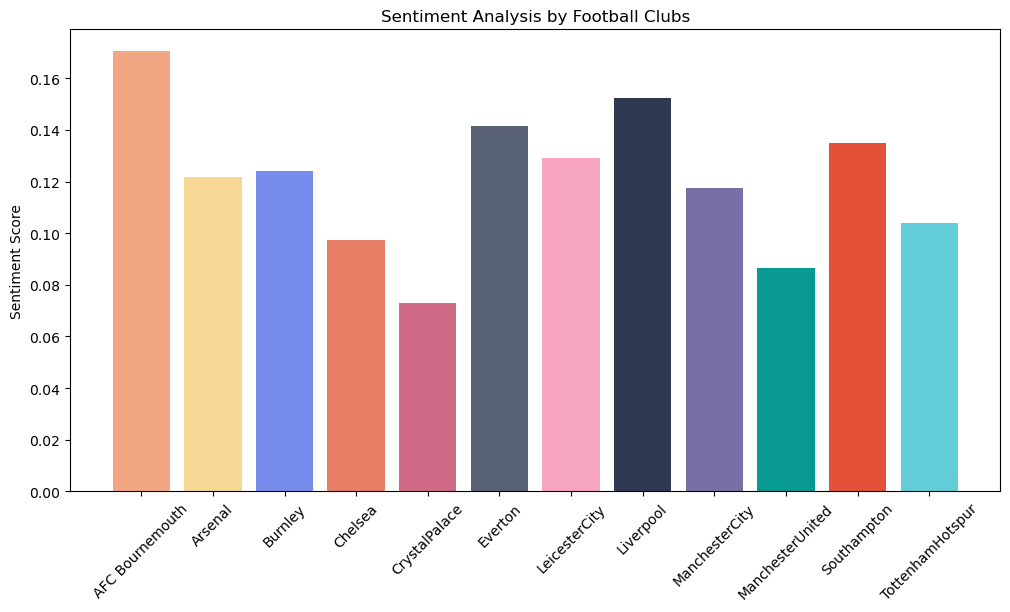

In [62]:
# Analyzing sentiment by football club
sentiment_by_team = df.groupby('file_name')['Sentiment'].mean()
plt.figure(figsize=(12, 6))
plt.bar(sentiment_by_team.index, sentiment_by_team.values,color=team_colors)
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis by Football Clubs')
plt.xticks(rotation=45)
plt.show()

### Plotting the Sentiment of each Football Club for each Continent <a class="anchor" id="foot-cont"></a>

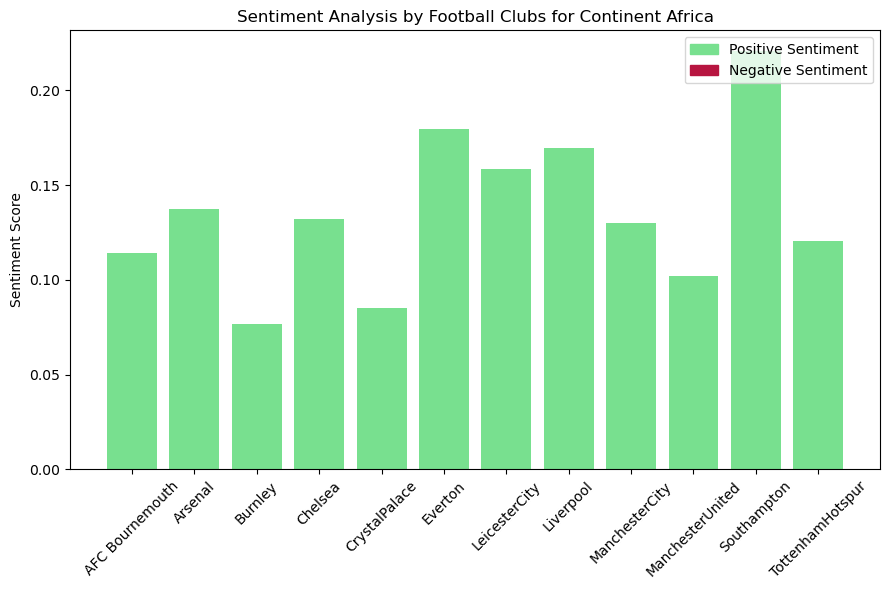

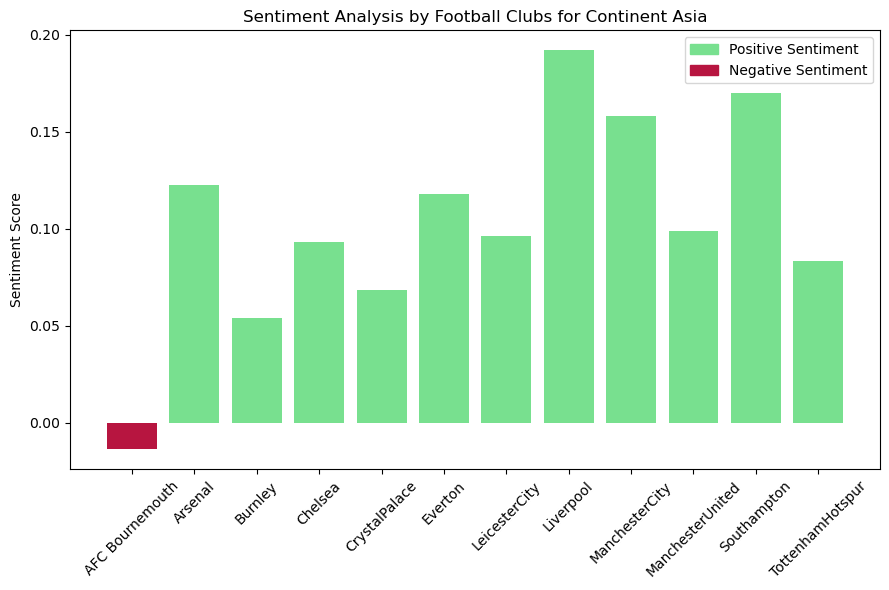

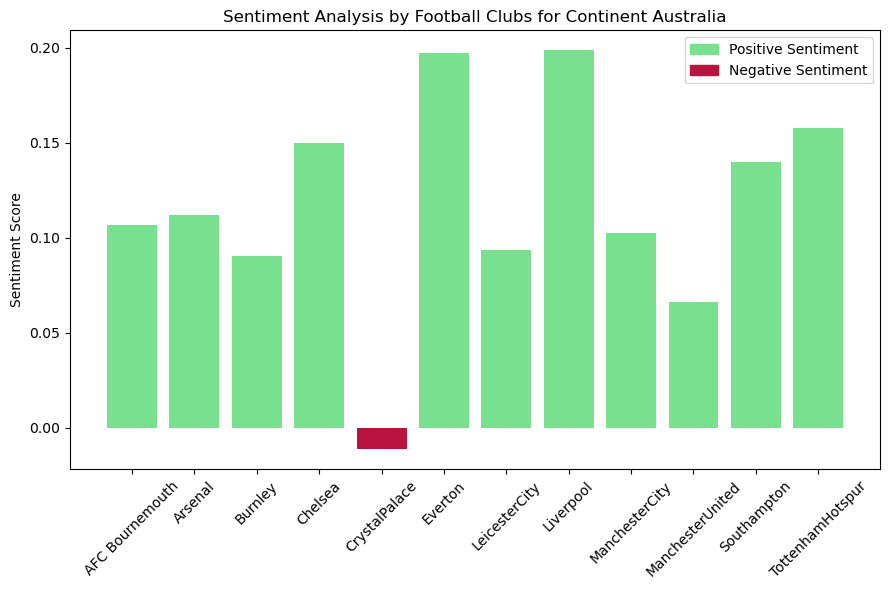

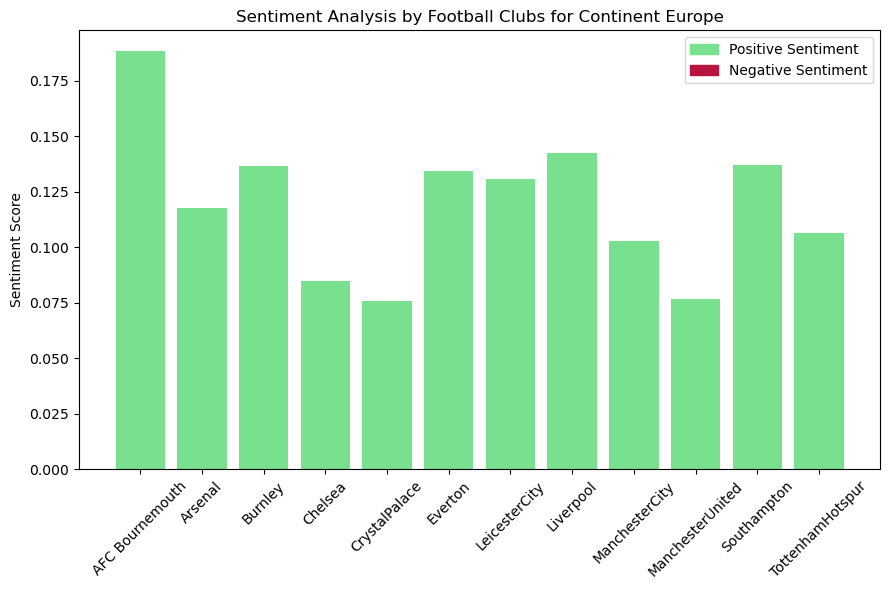

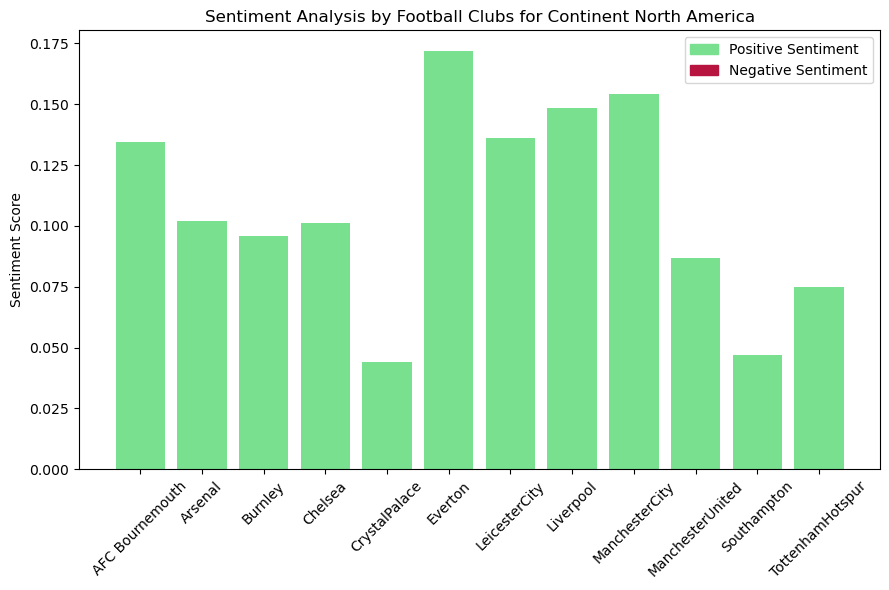

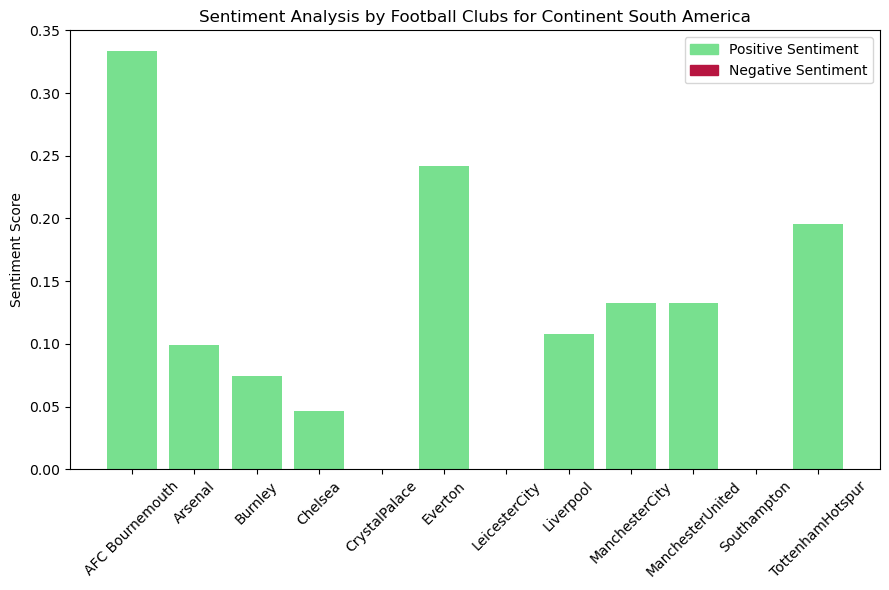

In [68]:
for i in continents:
    sentiment_by_team = df[df['continent']==i].groupby('file_name')['Sentiment'].mean()
    # Creating a colormap based on sentiment scores
    colors = np.where(sentiment_by_team.values >= 0, '#78e08f', '#b71540')
    plt.figure(figsize=(12, 6))
    plt.bar(sentiment_by_team.index, sentiment_by_team.values,color=colors)
    plt.ylabel('Sentiment Score')
    plt.title('Sentiment Analysis by Football Clubs for Continent '+str(i))
    plt.xticks(rotation=45)
    
    # Create legend handles and labels
    green_patch = plt.Rectangle((0, 0), 1, 1, color='#78e08f')
    red_patch = plt.Rectangle((0, 0), 1, 1, color='#b71540')
    legend_labels = ['Positive Sentiment', 'Negative Sentiment']
    
    # Add the legend to the plot
    plt.legend(handles=[green_patch, red_patch], labels=legend_labels, loc='upper right')
    
    # Adjust the layout to prevent overlapping
    plt.tight_layout(rect=[0, 0, 0.75, 1])
    plt.show()

## Topic Modelling 

### Preprocessing by removing Usernames, Hashtags, URL's, Stopwords and Punctuation from the tweets <a class="anchor" id="preprocess-topic"></a>

In [69]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'@\w+', '', text)  
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  
    text = re.sub(r'[^\w\s]', '', text)  
    
    # Tokenizing the text
    tokens = text.split()
    
    # Removing stopwords
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatizing the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return tokens

### Grouping the tweets based on Continent <a class="anchor" id="group-cont"></a>

In [70]:
# Grouping the tweets by continent
grouped_tweets = df.groupby('continent')['text'].apply(list)

### Perform topic modeling for each continent <a class="anchor" id="topic-cont"></a>

In [71]:
# Performing topic modeling for each continent
for continent, tweets in grouped_tweets.items():
    # Preprocessing the tweets
    preprocessed_tweets = [preprocess_text(tweet) for tweet in tweets]
    
    # Creating a dictionary from the preprocessed tweets
    dictionary = corpora.Dictionary(preprocessed_tweets)
    
    # Creating a corpus from the dictionary
    corpus = [dictionary.doc2bow(tweet) for tweet in preprocessed_tweets]
    
    # Training the LDA model
    num_topics = 3  # Specify the desired number of topics
    lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics)

    # Printing the topics for the current continent
    print(f"Topics for Continent: {continent}")
    for idx, topic in lda_model.print_topics(-1):
        print(f"Topic {idx}: {topic}")
    print("\n")

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_m

Topics for Continent: Africa
Topic 0: 0.015*"mufc" + 0.008*"not" + 0.007*"coyg" + 0.007*"chelsea" + 0.007*"arsenal" + 0.007*"afc" + 0.007*"lfc" + 0.007*"ynwa" + 0.006*"one" + 0.005*"fan"
Topic 1: 0.014*"arsenal" + 0.014*"mufc" + 0.010*"ynwa" + 0.009*"lfc" + 0.007*"afc" + 0.007*"liverpool" + 0.006*"not" + 0.005*"get" + 0.005*"united" + 0.005*"coyg"
Topic 2: 0.016*"arsenal" + 0.014*"mufc" + 0.011*"afc" + 0.008*"lfc" + 0.006*"player" + 0.005*"club" + 0.005*"team" + 0.005*"liverpool" + 0.005*"thfc" + 0.005*"game"




/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_m

Topics for Continent: Asia
Topic 0: 0.016*"mufc" + 0.009*"arsenal" + 0.006*"lfc" + 0.006*"transfer" + 0.005*"player" + 0.005*"premierleague" + 0.005*"united" + 0.005*"spur" + 0.005*"need" + 0.005*"city"
Topic 1: 0.015*"mufc" + 0.009*"afc" + 0.008*"ynwa" + 0.007*"arsenal" + 0.007*"chelsea" + 0.006*"lfc" + 0.005*"coyg" + 0.005*"player" + 0.005*"premierleague" + 0.005*"mancity"
Topic 2: 0.020*"mufc" + 0.011*"arsenal" + 0.010*"chelsea" + 0.009*"ynwa" + 0.009*"not" + 0.008*"lfc" + 0.006*"liverpool" + 0.006*"get" + 0.005*"league" + 0.005*"cfc"




/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_m

Topics for Continent: Australia
Topic 0: 0.021*"mufc" + 0.011*"mujournal" + 0.011*"arsenal" + 0.011*"united" + 0.010*"efc" + 0.010*"manchester" + 0.007*"transfer" + 0.007*"afc" + 0.006*"not" + 0.005*"everton"
Topic 1: 0.017*"efc" + 0.015*"mufc" + 0.013*"everton" + 0.012*"united" + 0.012*"mujournal" + 0.011*"manchester" + 0.009*"afc" + 0.007*"player" + 0.006*"arsenal" + 0.005*"not"
Topic 2: 0.013*"efc" + 0.009*"mufc" + 0.008*"everton" + 0.007*"arsenal" + 0.007*"chelsea" + 0.006*"afc" + 0.005*"lcfc" + 0.005*"mujournal" + 0.005*"get" + 0.005*"lfc"




/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_m

Topics for Continent: Europe
Topic 0: 0.015*"efc" + 0.012*"mufc" + 0.012*"everton" + 0.008*"mcfc" + 0.008*"afc" + 0.008*"evertonfc" + 0.008*"arsenal" + 0.006*"amp" + 0.006*"city" + 0.006*"man"
Topic 1: 0.017*"lfc" + 0.013*"efc" + 0.012*"arsenal" + 0.011*"mufc" + 0.009*"evertonfc" + 0.007*"afc" + 0.007*"lcfc" + 0.007*"thfc" + 0.007*"everton" + 0.006*"united"
Topic 2: 0.014*"lfc" + 0.012*"efc" + 0.010*"mufc" + 0.009*"arsenal" + 0.008*"thfc" + 0.008*"transfer" + 0.008*"everton" + 0.007*"mcfc" + 0.007*"not" + 0.007*"afc"




/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_m

Topics for Continent: North America
Topic 0: 0.014*"mufc" + 0.014*"arsenal" + 0.009*"ynwa" + 0.009*"lfc" + 0.007*"u" + 0.007*"get" + 0.006*"amp" + 0.006*"liverpool" + 0.005*"player" + 0.005*"efc"
Topic 1: 0.015*"mufc" + 0.010*"lfc" + 0.008*"efc" + 0.007*"club" + 0.006*"thfc" + 0.005*"not" + 0.005*"time" + 0.005*"afc" + 0.005*"get" + 0.005*"coyg"
Topic 2: 0.008*"lfc" + 0.007*"efc" + 0.006*"arsenal" + 0.006*"not" + 0.006*"ynwa" + 0.006*"like" + 0.006*"team" + 0.005*"everton" + 0.005*"mancity" + 0.005*"game"




/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_m

Topics for Continent: South America
Topic 0: 0.022*"lfc" + 0.010*"arsenal" + 0.009*"mufc" + 0.006*"chelsea" + 0.005*"soccer" + 0.005*"game" + 0.005*"get" + 0.004*"manchester" + 0.004*"liverpool" + 0.004*"play"
Topic 1: 0.035*"lfc" + 0.011*"efc" + 0.009*"afc" + 0.009*"mufc" + 0.007*"thfc" + 0.007*"cfc" + 0.006*"everton" + 0.006*"avfc" + 0.006*"wba" + 0.006*"atléti"
Topic 2: 0.022*"lfc" + 0.013*"torreira" + 0.011*"atléti" + 0.009*"arsenal" + 0.008*"still" + 0.008*"new" + 0.008*"mufc" + 0.008*"sell" + 0.007*"positive" + 0.007*"deal"




### Performing topic modelling based on Football Clubs <a class="anchor" id="topic-foot"></a>

In [72]:
# Grouping the tweets by continent
grouped_tweets = df.groupby('file_name')['text'].apply(list)

# Performing topic modeling for each football club
for team, tweets in grouped_tweets.items():
    # Preprocessing the tweets
    preprocessed_tweets = [preprocess_text(tweet) for tweet in tweets]
    
    # Creating a dictionary from the preprocessed tweets
    dictionary = corpora.Dictionary(preprocessed_tweets)
    
    # Creating a corpus from the dictionary
    corpus = [dictionary.doc2bow(tweet) for tweet in preprocessed_tweets]
    
    # Training the LDA model
    num_topics = 3  # Specify the desired number of topics
    lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics)
    
    # Printing the topics for the current continent
    print(f"Topics for Team: {team}")
    for idx, topic in lda_model.print_topics(-1):
        print(f"Topic {idx}: {topic}")
    print("\n")

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_m

Topics for Team: AFC Bournemouth
Topic 0: 0.067*"bournemouth" + 0.025*"infoapply" + 0.023*"time" + 0.022*"dorsetjobs" + 0.015*"full" + 0.007*"part" + 0.007*"today" + 0.006*"assistant" + 0.006*"poole" + 0.005*"amp"
Topic 1: 0.043*"bournemouth" + 0.011*"infoapply" + 0.010*"time" + 0.009*"dorsetjobs" + 0.008*"full" + 0.007*"dorset" + 0.006*"amp" + 0.003*"poole" + 0.003*"u" + 0.003*"book"
Topic 2: 0.046*"bournemouth" + 0.011*"part" + 0.008*"gtgtgt" + 0.007*"poole" + 0.007*"amp" + 0.006*"dorset" + 0.006*"join" + 0.006*"beach" + 0.005*"presentation" + 0.005*"online"




/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_m

Topics for Team: Arsenal
Topic 0: 0.046*"arsenal" + 0.039*"afc" + 0.009*"coyg" + 0.008*"not" + 0.007*"player" + 0.007*"aouar" + 0.006*"transfer" + 0.006*"partey" + 0.006*"game" + 0.005*"club"
Topic 1: 0.029*"afc" + 0.018*"arsenal" + 0.016*"coyg" + 0.007*"partey" + 0.007*"back" + 0.006*"fan" + 0.006*"not" + 0.005*"team" + 0.005*"aouar" + 0.005*"day"
Topic 2: 0.060*"arsenal" + 0.030*"afc" + 0.021*"coyg" + 0.011*"justarsenal" + 0.009*"aouar" + 0.009*"partey" + 0.007*"news" + 0.006*"get" + 0.005*"arteta" + 0.005*"fan"




/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_m

Topics for Team: Burnley
Topic 0: 0.036*"burnley" + 0.014*"burnleyfc" + 0.009*"twitterclarets" + 0.009*"bbcfootball" + 0.008*"listen" + 0.008*"goal" + 0.007*"live" + 0.007*"leicester" + 0.005*"bbclancssport" + 0.005*"nufc"
Topic 1: 0.023*"burnley" + 0.018*"burnleyfc" + 0.009*"avfc" + 0.008*"today" + 0.008*"weekend" + 0.007*"v" + 0.007*"good" + 0.007*"thfc" + 0.007*"sufc" + 0.007*"talk"
Topic 2: 0.050*"burnley" + 0.021*"burnleyfc" + 0.014*"v" + 0.011*"twitterclarets" + 0.009*"amp" + 0.008*"premierleague" + 0.008*"southampton" + 0.006*"sky" + 0.006*"sport" + 0.005*"dyche"




/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_m

Topics for Team: Chelsea
Topic 0: 0.081*"chelsea" + 0.065*"cfc" + 0.013*"chelseafc" + 0.009*"game" + 0.008*"come" + 0.007*"lampard" + 0.007*"goal" + 0.005*"wbache" + 0.005*"loan" + 0.005*"one"
Topic 1: 0.063*"chelsea" + 0.051*"cfc" + 0.015*"mendy" + 0.009*"chelseafc" + 0.008*"edouard" + 0.007*"not" + 0.007*"player" + 0.006*"kepa" + 0.006*"lampard" + 0.005*"cheliv"
Topic 2: 0.069*"chelsea" + 0.062*"cfc" + 0.015*"chelseafc" + 0.007*"lampard" + 0.006*"not" + 0.006*"havertz" + 0.005*"game" + 0.005*"player" + 0.004*"team" + 0.004*"cheliv"




/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_m

Topics for Team: CrystalPalace
Topic 0: 0.072*"cpfc" + 0.015*"palace" + 0.006*"get" + 0.005*"not" + 0.005*"chelsea" + 0.005*"fan" + 0.005*"season" + 0.005*"game" + 0.004*"player" + 0.004*"team"
Topic 1: 0.033*"cpfc" + 0.015*"crystalpalace" + 0.011*"game" + 0.009*"palace" + 0.007*"not" + 0.007*"chelsea" + 0.004*"season" + 0.004*"premierleague" + 0.004*"football" + 0.004*"u"
Topic 2: 0.049*"cpfc" + 0.011*"palace" + 0.005*"crystal" + 0.005*"premierleague" + 0.005*"league" + 0.005*"goal" + 0.005*"transfer" + 0.005*"player" + 0.004*"crystalpalace" + 0.004*"premier"




/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_m

Topics for Team: Everton
Topic 0: 0.071*"efc" + 0.046*"everton" + 0.032*"evertonfc" + 0.006*"player" + 0.006*"league" + 0.006*"transfer" + 0.006*"calvertlewin" + 0.005*"game" + 0.005*"ancelotti" + 0.005*"godfrey"
Topic 1: 0.064*"efc" + 0.029*"evertonfc" + 0.028*"everton" + 0.007*"league" + 0.007*"goal" + 0.007*"ancelotti" + 0.006*"player" + 0.006*"carlo" + 0.006*"premier" + 0.005*"blue"
Topic 2: 0.060*"efc" + 0.053*"everton" + 0.042*"evertonfc" + 0.006*"ancelotti" + 0.006*"transfer" + 0.005*"win" + 0.004*"live" + 0.004*"loan" + 0.004*"fan" + 0.004*"blue"




/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_m

Topics for Team: LeicesterCity
Topic 0: 0.081*"lcfc" + 0.007*"leicester" + 0.006*"league" + 0.005*"get" + 0.005*"not" + 0.005*"city" + 0.005*"player" + 0.005*"back" + 0.005*"goal" + 0.005*"club"
Topic 1: 0.057*"lcfc" + 0.017*"leicester" + 0.011*"city" + 0.011*"game" + 0.007*"well" + 0.007*"today" + 0.006*"leicestercity" + 0.006*"man" + 0.005*"get" + 0.005*"player"
Topic 2: 0.055*"lcfc" + 0.013*"leicester" + 0.009*"city" + 0.007*"fofana" + 0.006*"not" + 0.005*"league" + 0.005*"today" + 0.005*"game" + 0.004*"leicestercity" + 0.004*"mufc"




/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_m

Topics for Team: Liverpool
Topic 0: 0.060*"lfc" + 0.024*"ynwa" + 0.013*"liverpool" + 0.006*"get" + 0.006*"fan" + 0.005*"player" + 0.005*"league" + 0.005*"back" + 0.005*"time" + 0.005*"team"
Topic 1: 0.037*"ynwa" + 0.035*"lfc" + 0.015*"liverpool" + 0.008*"game" + 0.007*"red" + 0.006*"well" + 0.005*"league" + 0.004*"time" + 0.004*"good" + 0.004*"football"
Topic 2: 0.066*"lfc" + 0.024*"liverpool" + 0.015*"ynwa" + 0.007*"klopp" + 0.006*"get" + 0.005*"thiago" + 0.005*"red" + 0.005*"not" + 0.005*"one" + 0.005*"arsenal"




/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_m

Topics for Team: ManchesterCity
Topic 0: 0.025*"mancity" + 0.021*"city" + 0.019*"mcfc" + 0.009*"man" + 0.008*"manchestercity" + 0.008*"today" + 0.006*"manchester" + 0.006*"premierleague" + 0.006*"football" + 0.006*"game"
Topic 1: 0.049*"mcfc" + 0.015*"city" + 0.014*"mancity" + 0.009*"man" + 0.007*"manchester" + 0.006*"pep" + 0.006*"lfc" + 0.005*"league" + 0.005*"back" + 0.004*"afc"
Topic 2: 0.032*"mcfc" + 0.032*"mancity" + 0.012*"city" + 0.007*"manchester" + 0.007*"amp" + 0.006*"game" + 0.005*"mufc" + 0.005*"not" + 0.005*"player" + 0.005*"man"




/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_m

Topics for Team: ManchesterUnited
Topic 0: 0.067*"mufc" + 0.014*"united" + 0.010*"sancho" + 0.009*"transfer" + 0.009*"manchester" + 0.007*"not" + 0.006*"player" + 0.006*"telles" + 0.006*"manutd" + 0.006*"man"
Topic 1: 0.045*"mufc" + 0.013*"united" + 0.008*"transfer" + 0.007*"man" + 0.007*"manchester" + 0.007*"no" + 0.006*"club" + 0.006*"sancho" + 0.005*"manutd" + 0.005*"get"
Topic 2: 0.052*"mufc" + 0.013*"united" + 0.012*"not" + 0.010*"club" + 0.009*"player" + 0.007*"amp" + 0.005*"manchester" + 0.005*"get" + 0.005*"glazersoutwoodwardout" + 0.004*"time"




/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_m

Topics for Team: Southampton
Topic 0: 0.054*"southampton" + 0.010*"saintsfc" + 0.008*"hampshirejobs" + 0.008*"sotonjobs" + 0.006*"southamptonfc" + 0.006*"infoapply" + 0.006*"u" + 0.005*"today" + 0.005*"call" + 0.005*"premierleague"
Topic 1: 0.055*"southampton" + 0.022*"infoapply" + 0.022*"hampshirejobs" + 0.021*"sotonjobs" + 0.011*"saintsfc" + 0.007*"southamptonfc" + 0.005*"price" + 0.005*"sfc" + 0.004*"new" + 0.004*"assistant"
Topic 2: 0.036*"southampton" + 0.006*"amp" + 0.004*"saintsfc" + 0.004*"sotonjobs" + 0.004*"tottenham" + 0.004*"business" + 0.004*"u" + 0.004*"analyst" + 0.003*"see" + 0.003*"office"




/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_m

Topics for Team: TottenhamHotspur
Topic 0: 0.053*"thfc" + 0.026*"coys" + 0.021*"tottenham" + 0.015*"spur" + 0.006*"league" + 0.005*"game" + 0.005*"transfer" + 0.005*"mufc" + 0.004*"not" + 0.004*"no"
Topic 1: 0.040*"thfc" + 0.031*"spur" + 0.022*"coys" + 0.016*"tottenham" + 0.011*"mourinho" + 0.010*"jose" + 0.007*"fan" + 0.005*"not" + 0.004*"get" + 0.004*"u"
Topic 2: 0.038*"thfc" + 0.023*"spur" + 0.022*"coys" + 0.018*"tottenham" + 0.008*"game" + 0.006*"get" + 0.006*"chelsea" + 0.006*"son" + 0.005*"player" + 0.005*"bale"


